# MY CAPSTONE PROJECT

# PROBLEM STATEMENT

In December 2019, a mysterious respiratory illness was reported in Wuhan, China. It was identified as a novel coronavirus, named SARS-CoV-2, which is responsible for the Covid-19. This virus is believed to have originated from an animal source and was transmitted from animal to human and then human to human transmission became globally widespread.

On the 30th of January 2020, the World Health Organization (WHO) declared the outbreak a Public Health Emergency of International Concern (PHEIC)

On March 11th 2020, the WHO declared Covid-19 a global pandemic as a result of its widespread.


# PROBLEM OBJECTIVES

To develop a predictive modeling system that can leverage historical COVID-19 data to anticipate future trends in case counts, patient outcomes, and the geographical spread of the virus.

The following must be done:

1. Collection of reliable Covid-19 dataset and Data preprocessing

2. Identification of critical or engineering of new features to improve accuracy of predition

3. Development of robust machine learning models capable of forecasting future trends.

4. Model Testing and Validation


# PROJECT PHASES

# STEP 1: DATA ACQUISTION AND PREPARATION

In [ ]:
from google.colab import files
files.download('/path/to/your/file')


## TASK 1: IMPORT ALL RELEVANT LIBRARIES

In [419]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [420]:
# Libraries for data manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
# import random
# import math
# import time
warnings.filterwarnings('ignore')
####################################
# Libraries for machine learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

#from sklearn.ensemble import

In [421]:
!pip install prophet
from prophet import Prophet

## TASK 2: LOAD IN ALL THE DATASET


In [551]:
df1 = pd.read_csv("/content/drive/MyDrive/3MTT CAPSTONE PROJECT/Covid dataset/country_wise_latest.csv")
df2 = pd.read_csv("/content/drive/MyDrive/3MTT CAPSTONE PROJECT/Covid dataset/covid_19_clean_complete.csv")
df3 = pd.read_csv("/content/drive/MyDrive/3MTT CAPSTONE PROJECT/Covid dataset/day_wise.csv")
df4 = pd.read_csv("/content/drive/MyDrive/3MTT CAPSTONE PROJECT/Covid dataset/full_grouped.csv")
df5 = pd.read_csv("/content/drive/MyDrive/3MTT CAPSTONE PROJECT/Covid dataset/worldometer_data.csv")

### Using the .head() method, display the first 5 rows of the 5 imported dataset

In [552]:
df1.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [553]:
df2.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [554]:
df3.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [555]:
df4.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [556]:
df5.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


# STEP 2: DATA PRE-PROCESSING AND DATA SET MERGING

Having previewed the given dataset, I will be merging df2 and df4 together and carry out further analysis on them.

### TASK 2.1: PRELIMINARY ANALYSIS ON df2

In [428]:
# Using .shape() method to know the number of rows and columns in df2 dataframe (rows, columns)
df2.shape

(49068, 10)

In [429]:
# Using the .column attribute to display the column names present in the dataframe
df2.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [430]:
# Using .head() method to display the first 25 rows of the dataframe
df2.head(25)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.416100,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.069100,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.473500,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.868800,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [431]:
# Using .nunique to find out the number of Country/Region present in the dataframe
df2['Country/Region'].nunique()

187

In [432]:
# Using .info() method to get information about the dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [433]:
# Using .isna() and .sum() method to find columns with empty cells
# This will return the number of empty cells present in each column
df2.isna().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [434]:
# Using .drop() method to drop the Province/State column
df2a = df2.drop('Province/State', axis = 'columns')
df2a

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


### TASK 2.2: PRELIMINARY ANALYSIS ON df4

In [435]:
# Using .shape() method to know the number of rows and columns in df4 dataframe (rows, columns)
df4.shape

(35156, 10)

In [436]:
# Using the .column attribute to display the column names present in the dataframe
df4.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')

In [437]:
# Using .info() method to get information about the dataframe
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [438]:
# Using .isna() and .sum() method to find columns with empty cells
# This will return the number of empty cells present in each column
df4.isna().sum()

,0
Date,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
WHO Region,0


In [439]:
# Using .head() method to display the first 25 rows of the dataframe
df4.head(25)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
5,2020-01-22,Antigua and Barbuda,0,0,0,0,0,0,0,Americas
6,2020-01-22,Argentina,0,0,0,0,0,0,0,Americas
7,2020-01-22,Armenia,0,0,0,0,0,0,0,Europe
8,2020-01-22,Australia,0,0,0,0,0,0,0,Western Pacific
9,2020-01-22,Austria,0,0,0,0,0,0,0,Europe


### Task 2.3: DATASET MERGING OF df2 AND df4 TO FORM A NEW DATASET CALLED df0


In [440]:
# To check for the shared columns names in both df2a and df4
common_columns = list (set(df2a.columns) & set(df4.columns))
common_columns

['Confirmed',
 'Deaths',
 'Recovered',
 'WHO Region',
 'Country/Region',
 'Active',
 'Date']

In [441]:
# Using the .merge() method, I merged df2a and df4 datframe and assigned it to a new variable name called df0
df0 = pd.merge(df2a, df4, on = common_columns, how = 'outer')
df0

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,New deaths,New recovered
0,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa,0.0,0.0,0.0
1,Algeria,28.0339,1.6596,2020-01-23,0,0,0,0,Africa,0.0,0.0,0.0
2,Algeria,28.0339,1.6596,2020-01-24,0,0,0,0,Africa,0.0,0.0,0.0
3,Algeria,28.0339,1.6596,2020-01-25,0,0,0,0,Africa,0.0,0.0,0.0
4,Algeria,28.0339,1.6596,2020-01-26,0,0,0,0,Africa,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
50192,US,40.0000,-100.0000,2020-07-23,4038816,144430,1233269,2661117,Americas,68695.0,1114.0,22420.0
50193,US,40.0000,-100.0000,2020-07-24,4112531,145560,1261624,2705347,Americas,73715.0,1130.0,28355.0
50194,US,40.0000,-100.0000,2020-07-25,4178970,146465,1279414,2753091,Americas,66439.0,905.0,17790.0
50195,US,40.0000,-100.0000,2020-07-26,4233923,146935,1297863,2789125,Americas,54953.0,470.0,18449.0


### PRE-PROCESSING OF df0

In [442]:
# Using .head() method to display the 1st 5 rows of the merged dataset, df0
df0.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,New deaths,New recovered
0,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa,0.0,0.0,0.0
1,Algeria,28.0339,1.6596,2020-01-23,0,0,0,0,Africa,0.0,0.0,0.0
2,Algeria,28.0339,1.6596,2020-01-24,0,0,0,0,Africa,0.0,0.0,0.0
3,Algeria,28.0339,1.6596,2020-01-25,0,0,0,0,Africa,0.0,0.0,0.0
4,Algeria,28.0339,1.6596,2020-01-26,0,0,0,0,Africa,0.0,0.0,0.0


In [443]:
# Using the .dtypes method to get the data types of each columns in the dataframe
df0.dtypes

,0
Country/Region,object
Lat,float64
Long,float64
Date,object
Confirmed,int64
Deaths,int64
Recovered,int64
Active,int64
WHO Region,object
New cases,float64


In [444]:
# From the above, it is shown that date is displayed as an object instead of a datetime datatype
# To convert to datetime, we use the 'pd.to_datetime()' function
df0['Date'] = pd.to_datetime(df0['Date'])

In [445]:
# Using the .info() method to get information and confirm if the datetime change has been effected
df0.info()
# Note, The change has been effected.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50197 entries, 0 to 50196
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  50197 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            50197 non-null  datetime64[ns]
 4   Confirmed       50197 non-null  int64         
 5   Deaths          50197 non-null  int64         
 6   Recovered       50197 non-null  int64         
 7   Active          50197 non-null  int64         
 8   WHO Region      50197 non-null  object        
 9   New cases       35482 non-null  float64       
 10  New deaths      35482 non-null  float64       
 11  New recovered   35482 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 4.6+ MB


In [446]:
# Using the .isna() and .sum() method to check for missing values
df0.isna().sum()

,0
Country/Region,0
Lat,1129
Long,1129
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0
New cases,14715


In [447]:
# To fill all empty numerical column with 0, we used the datatype to fill using the .select_dtypes() and the .fillna() method
df0[df0.select_dtypes(include=['number']).columns] = df0.select_dtypes(include=['number']).fillna(0)
# Then, we check if there are any missing value using the .isna() and .sum() method
df0.isna().sum()

,0
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0
New cases,0


### df0 DATAFRAME SNAPSHOT

In [448]:
df0

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,New deaths,New recovered
0,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa,0.0,0.0,0.0
1,Algeria,28.0339,1.6596,2020-01-23,0,0,0,0,Africa,0.0,0.0,0.0
2,Algeria,28.0339,1.6596,2020-01-24,0,0,0,0,Africa,0.0,0.0,0.0
3,Algeria,28.0339,1.6596,2020-01-25,0,0,0,0,Africa,0.0,0.0,0.0
4,Algeria,28.0339,1.6596,2020-01-26,0,0,0,0,Africa,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
50192,US,40.0000,-100.0000,2020-07-23,4038816,144430,1233269,2661117,Americas,68695.0,1114.0,22420.0
50193,US,40.0000,-100.0000,2020-07-24,4112531,145560,1261624,2705347,Americas,73715.0,1130.0,28355.0
50194,US,40.0000,-100.0000,2020-07-25,4178970,146465,1279414,2753091,Americas,66439.0,905.0,17790.0
50195,US,40.0000,-100.0000,2020-07-26,4233923,146935,1297863,2789125,Americas,54953.0,470.0,18449.0


In [449]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50197 entries, 0 to 50196
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  50197 non-null  object        
 1   Lat             50197 non-null  float64       
 2   Long            50197 non-null  float64       
 3   Date            50197 non-null  datetime64[ns]
 4   Confirmed       50197 non-null  int64         
 5   Deaths          50197 non-null  int64         
 6   Recovered       50197 non-null  int64         
 7   Active          50197 non-null  int64         
 8   WHO Region      50197 non-null  object        
 9   New cases       50197 non-null  float64       
 10  New deaths      50197 non-null  float64       
 11  New recovered   50197 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 4.6+ MB


In [450]:
df0['Country/Region'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Eswatini',
       'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mauritius', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Seychelles', 'Sierra Leone', 'South Africa', 'South Sudan',
       'Tanzania', 'Togo', 'Uganda', 'Western Sahara', 'Zambia',
       'Zimbabwe', 'Antigua and Barbuda', 'Argentina', 'Bahamas',
       'Barbados', 'Belize', 'Bolivia', 'Brazil', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana',
       'Haiti', 'Honduras', 'Jamaica', '

In [451]:
df0.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region', 'New cases', 'New deaths',
       'New recovered'],
      dtype='object')

In [452]:
df0['Country/Region'].nunique()

187

### df5 dataframe snapshot

In [453]:
df5.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [454]:
df5.isna().sum()

,0
Country/Region,0
Continent,1
Population,1
TotalCases,0
NewCases,205
TotalDeaths,21
NewDeaths,206
TotalRecovered,4
NewRecovered,206
ActiveCases,4


In [455]:
# To fill all empty numerical column with 0, we used the datatype to fill using the .select_dtypes() and the .fillna() method
df5[df5.select_dtypes(include=['number']).columns] = df5.select_dtypes(include=['number']).fillna(0)
# Then, we check if there are any missing value using the .isna() and .sum() method
df5.isna().sum()

,0
Country/Region,0
Continent,1
Population,0
TotalCases,0
NewCases,0
TotalDeaths,0
NewDeaths,0
TotalRecovered,0
NewRecovered,0
ActiveCases,0


In [456]:
# To check the population datatype
df5['Population'].dtypes

dtype('float64')

In [457]:
# To convert the population data type to an integer
df5['Population'] = df5['Population'].astype(int)
df5

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,331198130,5032179,0.0,162804.0,0.0,2576668.0,0.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,212710692,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1381344997,2025409,0.0,41638.0,0.0,1377384.0,0.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,145940924,871894,0.0,14606.0,0.0,676357.0,0.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,59381566,538184,0.0,9604.0,0.0,387316.0,0.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4992,13,0.0,1.0,0.0,10.0,0.0,2.0,0.0,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,26247,13,0.0,0.0,0.0,7.0,0.0,6.0,0.0,495.0,0.0,424.0,16154.0,NaN
206,Falkland Islands,South America,3489,13,0.0,0.0,0.0,13.0,0.0,0.0,0.0,3726.0,0.0,1816.0,520493.0,NaN
207,Vatican City,Europe,801,12,0.0,0.0,0.0,12.0,0.0,0.0,0.0,14981.0,0.0,0.0,0.0,Europe


In [458]:
df5['Country/Region'].nunique()

209

In [459]:
df5['Country/Region'].unique()

array(['USA', 'Brazil', 'India', 'Russia', 'South Africa', 'Mexico',
       'Peru', 'Chile', 'Colombia', 'Spain', 'Iran', 'UK', 'Saudi Arabia',
       'Pakistan', 'Bangladesh', 'Italy', 'Turkey', 'Argentina',
       'Germany', 'France', 'Iraq', 'Philippines', 'Indonesia', 'Canada',
       'Qatar', 'Kazakhstan', 'Egypt', 'Ecuador', 'Bolivia', 'Sweden',
       'Oman', 'Israel', 'Ukraine', 'Dominican Republic', 'Panama',
       'Belgium', 'Kuwait', 'Belarus', 'UAE', 'Romania', 'Netherlands',
       'Singapore', 'Guatemala', 'Portugal', 'Poland', 'Nigeria',
       'Honduras', 'Bahrain', 'Japan', 'Armenia', 'Ghana', 'Kyrgyzstan',
       'Afghanistan', 'Switzerland', 'Algeria', 'Azerbaijan', 'Morocco',
       'Uzbekistan', 'Serbia', 'Moldova', 'Ireland', 'Kenya', 'Venezuela',
       'Nepal', 'Austria', 'Costa Rica', 'Ethiopia', 'Australia',
       'El Salvador', 'Czechia', 'Cameroon', 'Ivory Coast', 'S. Korea',
       'Denmark', 'Palestine', 'Bosnia and Herzegovina', 'Bulgaria',
       'Mada

In [460]:
df5.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

## df0a DATAFRAME

In [461]:
df0a = df0.copy()  # Create a copy of df0
df0a

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,New deaths,New recovered
0,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa,0.0,0.0,0.0
1,Algeria,28.0339,1.6596,2020-01-23,0,0,0,0,Africa,0.0,0.0,0.0
2,Algeria,28.0339,1.6596,2020-01-24,0,0,0,0,Africa,0.0,0.0,0.0
3,Algeria,28.0339,1.6596,2020-01-25,0,0,0,0,Africa,0.0,0.0,0.0
4,Algeria,28.0339,1.6596,2020-01-26,0,0,0,0,Africa,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
50192,US,40.0000,-100.0000,2020-07-23,4038816,144430,1233269,2661117,Americas,68695.0,1114.0,22420.0
50193,US,40.0000,-100.0000,2020-07-24,4112531,145560,1261624,2705347,Americas,73715.0,1130.0,28355.0
50194,US,40.0000,-100.0000,2020-07-25,4178970,146465,1279414,2753091,Americas,66439.0,905.0,17790.0
50195,US,40.0000,-100.0000,2020-07-26,4233923,146935,1297863,2789125,Americas,54953.0,470.0,18449.0


In [462]:
df0a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50197 entries, 0 to 50196
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  50197 non-null  object        
 1   Lat             50197 non-null  float64       
 2   Long            50197 non-null  float64       
 3   Date            50197 non-null  datetime64[ns]
 4   Confirmed       50197 non-null  int64         
 5   Deaths          50197 non-null  int64         
 6   Recovered       50197 non-null  int64         
 7   Active          50197 non-null  int64         
 8   WHO Region      50197 non-null  object        
 9   New cases       50197 non-null  float64       
 10  New deaths      50197 non-null  float64       
 11  New recovered   50197 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 4.6+ MB


# STEP 3: WORKING ON KPIs, PERFORMING FEATURE ENGINEERING AND CREATING VISUALIZATIONS

### 1. Covid Cases (Confirmed)

The cumulative number of confirmed COVID-19 cases reported.

a. Total global covid - 19 cases (Confirmed)

b. Total confirmed by country

c. Case Fatality rate (CFR) = (Total Deaths / Total Confirmed Cases) X 100

In [463]:
# Using the .sum() method, I got the total global covid - 19 cases
covid_confirmed = df0.Confirmed.sum()
print (f"Total global confirmed covid-19 case: {covid_confirmed}")

Total global confirmed covid-19 case: 907385752


In [464]:
# I used the .sum() and .sort_values() method to get the total covid cases by country
# The .sort_values() method arranged the total covid cases in ascending order
covid_confirmed_by_country = df0.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending = False)
covid_confirmed_by_country

,Confirmed
Country/Region,
US,224345948
Brazil,89524967
United Kingdom,53496149
Russia,45408411
France,42420831
...,...
Saint Kitts and Nevis,1772
Greenland,1507
Holy See,1356


In [465]:
# To get the top 10 countires with the highest confirmed cases
top10_covid_confirmed = covid_confirmed_by_country.head(10)
top10_covid_confirmed

# Convert the series to a DataFrame for plotting
top10_covid_confirmed_df = top10_covid_confirmed.reset_index()

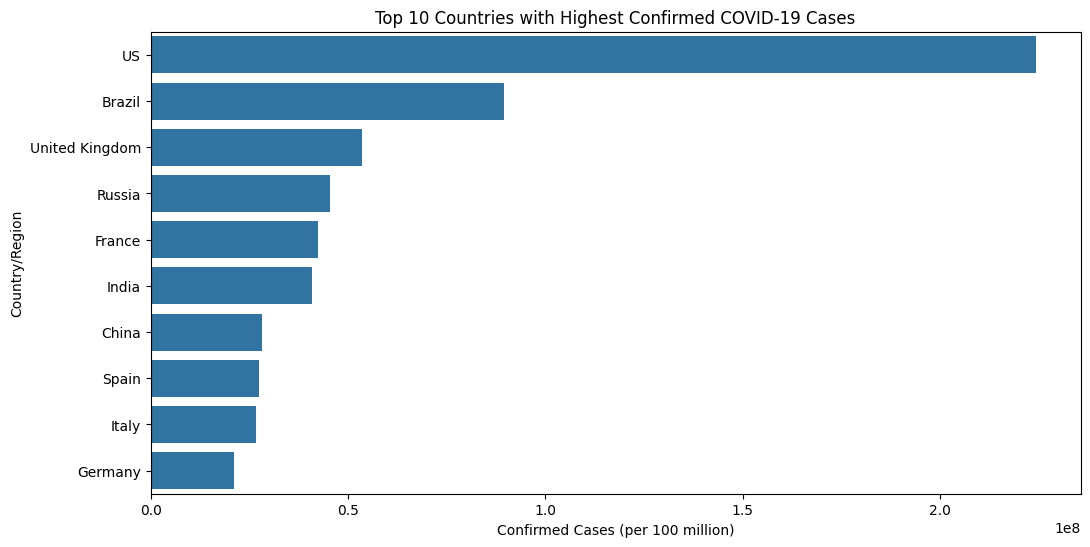

In [466]:
# To visualize the top 10 countries with the highest number of confirmed cases
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x='Confirmed', y='Country/Region', data = top10_covid_confirmed_df)
plt.title('Top 10 Countries with Highest Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases (per 100 million)')
plt.ylabel('Country/Region')
plt.show()

In [467]:
# To get the case fatality rate, I divided the total deaths by the total confirmed cases and divided by hundred
# I also created a new column in the dataset
CFR_by_country = round(df0.groupby('Country/Region')['Deaths'].sum() / df0.groupby('Country/Region')['Confirmed'].sum() * 100, 2).sort_values(ascending = False)
CFR_by_country

,0
Country/Region,
Yemen,26.36
Belgium,15.34
United Kingdom,14.95
France,14.37
Italy,13.86
...,...
Saint Vincent and the Grenadines,0.00
Saint Lucia,0.00
Saint Kitts and Nevis,0.00


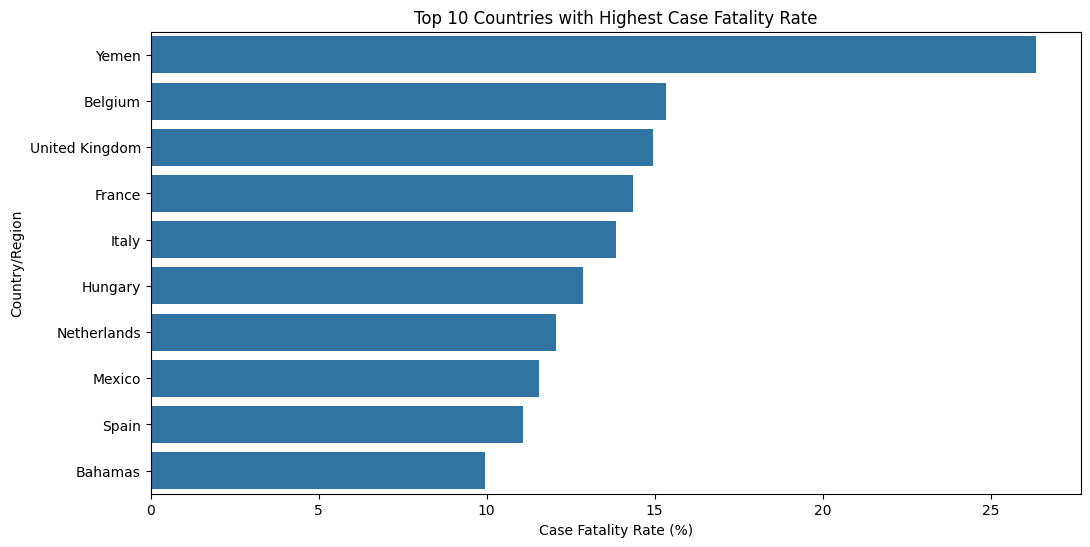

In [468]:
# Merge CFR back into df0a:
df0a = df0a.merge(CFR_by_country.rename('CFR'), left_on='Country/Region', right_index=True)

# Visualizations:

# 1. Bar plot for top N countries with highest CFR:
top_n = 10  # Change to the desired number of countries
plt.figure(figsize=(12, 6))
sns.barplot(y=CFR_by_country.head(top_n).index, x=CFR_by_country.head(top_n).values)
plt.title(f'Top {top_n} Countries with Highest Case Fatality Rate')
plt.ylabel('Country/Region')
plt.xlabel('Case Fatality Rate (%)')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

### 2. Growth

a. Growth or case per day

b. Growh rate per day

**Feature Engineering**

Daily Growth Rate(%) = (Confirmed(Present Day) - Confirmed(Previous Day) / Confirmed(Previous Day)) x 100

c. Daily growth rate by country

In [469]:
# To get confirmed per day
Confirmed_per_day = df0.groupby('Date')['Confirmed'].sum()
Confirmed_per_day

,Confirmed
Date,
2020-01-22,1103
2020-01-23,1297
2020-01-24,1861
2020-01-25,2840
2020-01-26,4197
...,...
2020-07-23,16306115
2020-07-24,16590651
2020-07-25,16848105


In [470]:
Confirmed_per_day = df0.groupby('Date')['Confirmed'].sum()
growth_rate_per_day = round(Confirmed_per_day.diff() / Confirmed_per_day.shift(1) * 100, 2)
growth_rate_per_day

,Confirmed
Date,
2020-01-22,NaN
2020-01-23,17.59
2020-01-24,43.48
2020-01-25,52.61
2020-01-26,47.78
...,...
2020-07-23,1.78
2020-07-24,1.74
2020-07-25,1.55


In [471]:
# I used .groupby() to group data based on country and date and used .sum() to sum the confirmed column
# I used .pct_chage() to calculate % change
# I used the fillna() to fill the missing values with 0

daily_cases = df0a.groupby(['Country/Region', 'Date'])['Confirmed'].sum().reset_index()
daily_cases['Daily Growth Rate(%)'] = round(daily_cases.groupby('Country/Region')['Confirmed'].pct_change() * 100,2)
daily_cases['Daily Growth Rate(%)'].fillna(0, inplace=True)

# Merge the GrowthRate column back into df0a
df0a= df0a.merge(daily_cases[['Country/Region', 'Date', 'Daily Growth Rate(%)']], on=['Country/Region', 'Date'], how='left')
df0a

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,New deaths,New recovered,CFR,Daily Growth Rate(%)
0,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00
1,Algeria,28.0339,1.6596,2020-01-23,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00
2,Algeria,28.0339,1.6596,2020-01-24,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00
3,Algeria,28.0339,1.6596,2020-01-25,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00
4,Algeria,28.0339,1.6596,2020-01-26,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50192,US,40.0000,-100.0000,2020-07-23,4038816,144430,1233269,2661117,Americas,68695.0,1114.0,22420.0,4.91,1.73
50193,US,40.0000,-100.0000,2020-07-24,4112531,145560,1261624,2705347,Americas,73715.0,1130.0,28355.0,4.91,1.83
50194,US,40.0000,-100.0000,2020-07-25,4178970,146465,1279414,2753091,Americas,66439.0,905.0,17790.0,4.91,1.62
50195,US,40.0000,-100.0000,2020-07-26,4233923,146935,1297863,2789125,Americas,54953.0,470.0,18449.0,4.91,1.31


In [472]:
daily_cases = df0a.groupby(['Country/Region', 'Date'])['Confirmed'].sum().reset_index()
daily_cases['GrowthRate'] = round(daily_cases.groupby('Country/Region')['Confirmed'].pct_change() * 100,2)
daily_cases['GrowthRate'].fillna(0, inplace=True)
daily_cases

,Country/Region,Date,Confirmed,GrowthRate
0,Afghanistan,2020-01-22,0,0.00
1,Afghanistan,2020-01-23,0,0.00
2,Afghanistan,2020-01-24,0,0.00
3,Afghanistan,2020-01-25,0,0.00
4,Afghanistan,2020-01-26,0,0.00
...,...,...,...,...
35151,Zimbabwe,2020-07-23,2124,4.42
35152,Zimbabwe,2020-07-24,2296,8.10
35153,Zimbabwe,2020-07-25,2434,6.01
35154,Zimbabwe,2020-07-26,2512,3.20


### 3. Deaths

a. Total global covid - 19 deaths

b. Total deaths by country

**Feature Engineering**

Death rate (Mortality Rate) = (Total Covid Deaths / Total Covid Cases) x 100

c. Death rate by country


In [473]:
# Using the .sum() method, I got the total global covid - 19 deaths
covid_deaths = df0.Deaths.sum()
print (f"Total global covid-19 deaths: {covid_deaths}")

Total global covid-19 deaths: 52497434


In [474]:
# I used the .sum() and .sort_values() method to get the total covid death cases by country
# The .sort_values() method arranged the total covid death cases in ascending order
covid_deaths_by_country = df0.groupby('Country/Region')['Deaths'].sum().sort_values(ascending = False)
covid_deaths_by_country

,Deaths
Country/Region,
US,11011411
United Kingdom,7995550
France,6097020
Brazil,3938034
Italy,3707717
...,...
Mongolia,0
Timor-Leste,0
Seychelles,0


In [475]:
# To get the top 10 countires with the highest deaths
top10_covid_deaths = covid_deaths_by_country.head(10)
top10_covid_deaths

# Convert the series to a DataFrame for plotting
top10_covid_deaths_df = top10_covid_deaths.reset_index()

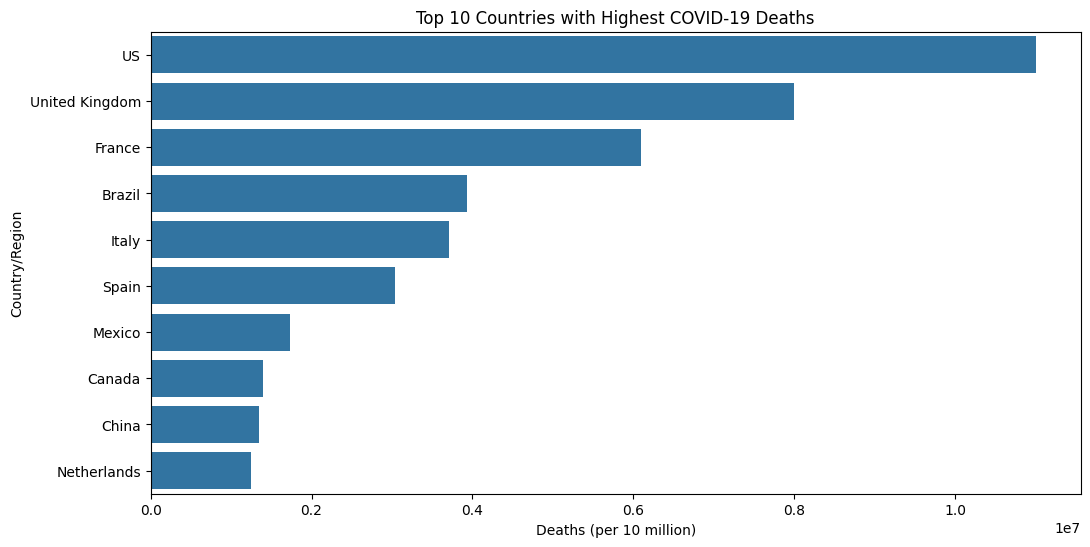

In [476]:
# To visualize the top 10 countries with the highest number of deaths
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x='Deaths', y='Country/Region', data = top10_covid_deaths_df)
plt.title('Top 10 Countries with Highest COVID-19 Deaths')
plt.xlabel('Deaths (per 10 million)')
plt.ylabel('Country/Region')
plt.show()

In [477]:
# I got death rate by dividing death by confirmed and multiplied by 100
df0a['Death Rate(%)'] = round((df0a['Deaths'] / df0a['Confirmed']) * 100, 2)
df0a['Death Rate(%)'].fillna(0, inplace=True)
df0a

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,New deaths,New recovered,CFR,Daily Growth Rate(%),Death Rate(%)
0,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00
1,Algeria,28.0339,1.6596,2020-01-23,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00
2,Algeria,28.0339,1.6596,2020-01-24,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00
3,Algeria,28.0339,1.6596,2020-01-25,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00
4,Algeria,28.0339,1.6596,2020-01-26,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50192,US,40.0000,-100.0000,2020-07-23,4038816,144430,1233269,2661117,Americas,68695.0,1114.0,22420.0,4.91,1.73,3.58
50193,US,40.0000,-100.0000,2020-07-24,4112531,145560,1261624,2705347,Americas,73715.0,1130.0,28355.0,4.91,1.83,3.54
50194,US,40.0000,-100.0000,2020-07-25,4178970,146465,1279414,2753091,Americas,66439.0,905.0,17790.0,4.91,1.62,3.50
50195,US,40.0000,-100.0000,2020-07-26,4233923,146935,1297863,2789125,Americas,54953.0,470.0,18449.0,4.91,1.31,3.47


In [478]:
# I used the .mean() and .sort_values() method to get the total recovered by country
# The .sort_values() method arranged the total recovered in ascending order
death_rate_by_country = df0a.groupby('Country/Region')['Death Rate(%)'].mean().sort_values(ascending=False)
death_rate_by_country = round(death_rate_by_country, 2)

# To get the top 10 countries with the highest death rates
top10_death_rates = death_rate_by_country.head(10)

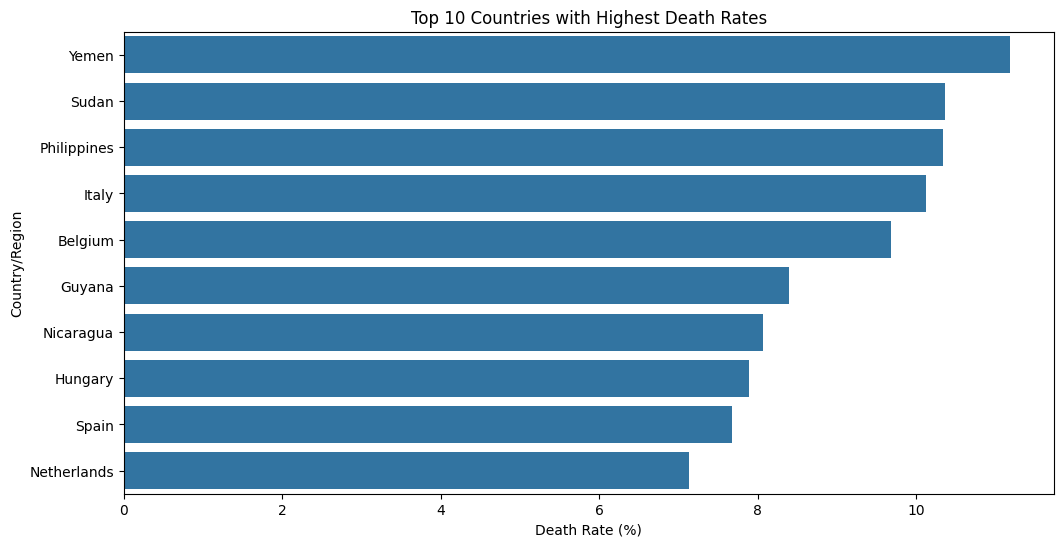

In [479]:
# Convert the series to a DataFrame for plotting
top10_death_rates_df = top10_death_rates.reset_index()

# Create the horizontal bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x='Death Rate(%)', y='Country/Region', data=top10_death_rates_df)
plt.title('Top 10 Countries with Highest Death Rates')
plt.xlabel('Death Rate (%)')
plt.ylabel('Country/Region')
plt.show()

### 4. Recovery


a. Total recovered

b. Total recovered by country

**Feature Engineering**

Recovery rate = (Total Recoveries/Total Confirmed Cases) x 100

c. Recovery rate by country


In [480]:
# Using the .sum() method, I got the total recovered
total_recovered = df0.Recovered.sum()
print (f"Total Recovered: {total_recovered}")

Total Recovered: 408969065


In [481]:
# I used the .sum() and .sort_values() method to get the total recovered by country
# The .sort_values() method arranged the total recovered in ascending order
total_recovered_by_country = df0.groupby('Country/Region')['Recovered'].sum().sort_values(ascending = False)

In [482]:
# To get the top 10 countires with the highest number of recovery
top10_covid_recovery = total_recovered_by_country.head(10)
top10_covid_recovery

# Convert the series to a DataFrame for plotting
top10_covid_recovery_df = top10_covid_recovery.reset_index()

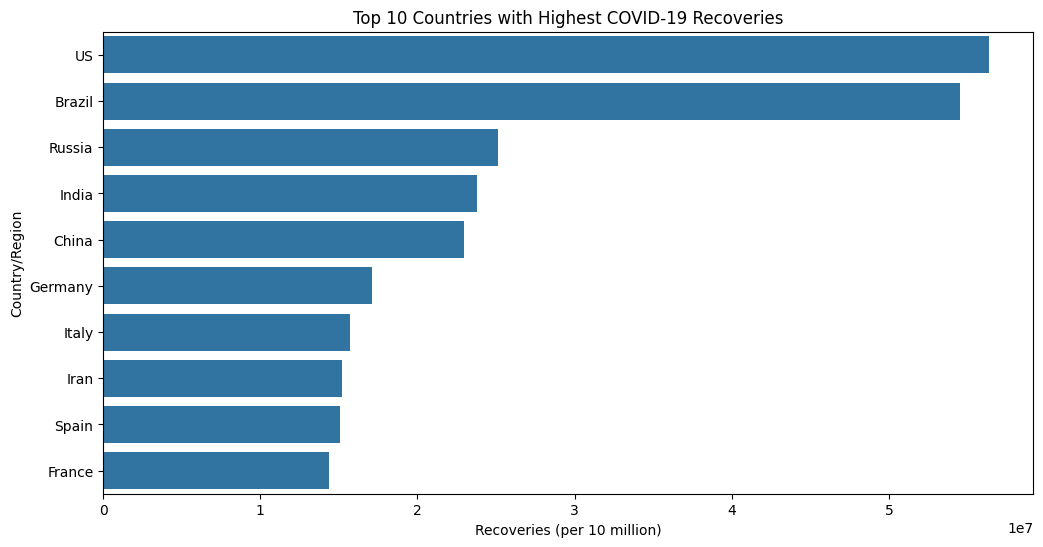

In [483]:
# To visualize the top 10 countries with the highest number of recovery
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x='Recovered', y='Country/Region', data = top10_covid_recovery_df)
plt.title('Top 10 Countries with Highest COVID-19 Recoveries')
plt.xlabel('Recoveries (per 10 million)')
plt.ylabel('Country/Region')
plt.show()

In [484]:
# I got recovery rate by dividing recovered by confirmed and multiplied by 100
df0a['Recovery Rate(%)'] = round((df0a['Recovered'] / df0a['Confirmed']) * 100, 2)
df0a['Recovery Rate(%)'].fillna(0, inplace=True)
df0a

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,New deaths,New recovered,CFR,Daily Growth Rate(%),Death Rate(%),Recovery Rate(%)
0,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00,0.00
1,Algeria,28.0339,1.6596,2020-01-23,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00,0.00
2,Algeria,28.0339,1.6596,2020-01-24,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00,0.00
3,Algeria,28.0339,1.6596,2020-01-25,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00,0.00
4,Algeria,28.0339,1.6596,2020-01-26,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50192,US,40.0000,-100.0000,2020-07-23,4038816,144430,1233269,2661117,Americas,68695.0,1114.0,22420.0,4.91,1.73,3.58,30.54
50193,US,40.0000,-100.0000,2020-07-24,4112531,145560,1261624,2705347,Americas,73715.0,1130.0,28355.0,4.91,1.83,3.54,30.68
50194,US,40.0000,-100.0000,2020-07-25,4178970,146465,1279414,2753091,Americas,66439.0,905.0,17790.0,4.91,1.62,3.50,30.62
50195,US,40.0000,-100.0000,2020-07-26,4233923,146935,1297863,2789125,Americas,54953.0,470.0,18449.0,4.91,1.31,3.47,30.65


In [485]:
# I used the .sum() and .sort_values() method to get the total recovered by country
# The .sort_values() method arranged the total recovered in ascending order
recovery_rate_by_country = df0a.groupby('Country/Region')['Recovery Rate(%)'].mean().sort_values(ascending=False)
recovery_rate_by_country = round(recovery_rate_by_country, 2)
recovery_rate_by_country

,Recovery Rate(%)
Country/Region,
China,75.01
Cambodia,70.42
Thailand,67.04
Vietnam,66.57
Liechtenstein,63.58
...,...
Sweden,0.00
Mozambique,0.00
Canada,0.00


In [486]:
# I used the .mean() and .sort_values() method to get the total recovered by country
# The .sort_values() method arranged the total recovered in ascending order
recovery_rate_by_country = df0a.groupby('Country/Region')['Recovery Rate(%)'].mean().sort_values(ascending=False)
recovery_rate_by_country = round(recovery_rate_by_country, 2)

# To get the top 10 countries with the highest death rates
top10_recovery_rates = recovery_rate_by_country.head(10)

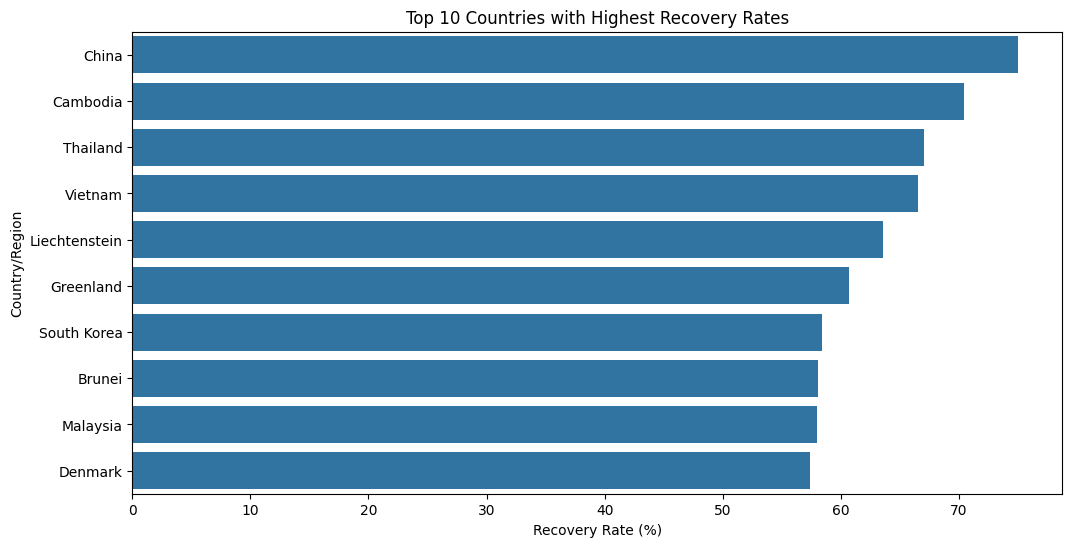

In [487]:
# Convert the series to a DataFrame for plotting
top10_recovery_rates_df = top10_recovery_rates.reset_index()

# Create the horizontal bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x='Recovery Rate(%)', y='Country/Region', data=top10_recovery_rates_df)
plt.title('Top 10 Countries with Highest Recovery Rates')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('Country/Region')
plt.show()

### 5. Active Cases

The number of currently active COVID-19 cases (i.e., total confirmed cases minus recoveries and deaths).

a. Total global active case

b. Total active cases by country

In [488]:
# Using the .sum() method, I got the total global active cases
total_active_case = df0.Active.sum()
print (f"Total global active case: {total_active_case}")

Total global active case: 445919253


In [489]:
# I used the .sum() and .sort_values() method to get the total active covid cases by country
# The .sort_values() method arranged the total active covid cases in ascending order
total_active_case_by_country = df0.groupby('Country/Region')['Active'].sum().sort_values(ascending = False)
total_active_case_by_country

,Active
Country/Region,
US,156981121
United Kingdom,45248305
Brazil,31094060
France,21959719
Russia,19668578
...,...
Saint Kitts and Nevis,477
Dominica,400
Saint Lucia,376


### df0a SNAPSHOT

In [490]:
df0a

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,New deaths,New recovered,CFR,Daily Growth Rate(%),Death Rate(%),Recovery Rate(%)
0,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00,0.00
1,Algeria,28.0339,1.6596,2020-01-23,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00,0.00
2,Algeria,28.0339,1.6596,2020-01-24,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00,0.00
3,Algeria,28.0339,1.6596,2020-01-25,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00,0.00
4,Algeria,28.0339,1.6596,2020-01-26,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50192,US,40.0000,-100.0000,2020-07-23,4038816,144430,1233269,2661117,Americas,68695.0,1114.0,22420.0,4.91,1.73,3.58,30.54
50193,US,40.0000,-100.0000,2020-07-24,4112531,145560,1261624,2705347,Americas,73715.0,1130.0,28355.0,4.91,1.83,3.54,30.68
50194,US,40.0000,-100.0000,2020-07-25,4178970,146465,1279414,2753091,Americas,66439.0,905.0,17790.0,4.91,1.62,3.50,30.62
50195,US,40.0000,-100.0000,2020-07-26,4233923,146935,1297863,2789125,Americas,54953.0,470.0,18449.0,4.91,1.31,3.47,30.65


### Addition of Population column from df5 to df0a

This will enable create a case per population column



*   Population by country
*   Top 10 countries with the highest population



In [491]:
# To derive case per population, I will merge the country and population from df5 into df0a
# df0a = df0a.merge(df5[['Country/Region', 'Population']], on='Country/Region', how='left')

In [492]:
# Due to inconsistencies in the country names between df5 and df0a
# I will standardize the country names by creating a dictionary to map inconsistent country names in df0a to those in df5.
country_mapping = {
    # Example mappings:
    "USA": "US",
    "UK": "United Kingdom",
    "Mainland China": "China",
    "Republic of Ireland": "Ireland",
    "Republic of Korea": "South Korea",
    "Republic of Moldova": "Moldova",
    "United Arab Emirates": "UAE",
    "Viet Nam": "Vietnam",
    "Centrafrique": "Central Africa",
    "Congo (Brazzaville)": "Congo",
    "Congo (Kinshasa)": "Democratic Republic of Congo",
    "Czechia": "Czech Republic",
    "Gambia, The": "Gambia",
    "Iran (Islamic Republic of)": "Iran",
    "Republic of Macedonia": "Macedonia",
    "Republic of Moldova": "Moldova",
    "Russian Federation": "Russia",
    "Saint Vincent and the Grenadines": "Saint Vincent and Grenadines",
    "Somaliland": "Somalia",
    "Syria": "Syria",
    "Taiwan*": "Taiwan",
    "Tanzania": "Tanzania",
    "The Gambia": "Gambia",
    "Cote d'Ivoire": "Cote d_Ivoire",
    "Republic of Ireland": "Ireland",

}

# Apply the mapping to df0a's Country/Region column:
df0a['Country/Region'] = df0a['Country/Region'].replace(country_mapping)

# 2. Remove Extra Spaces:
df0a['Country/Region'] = df0a['Country/Region'].str.strip()
df5['Country/Region'] = df5['Country/Region'].str.strip()


# I will now merge the DataFrames with the standardized and cleaned country names:
df0a = df0a.merge(df5[['Country/Region', 'Population']], on='Country/Region', how='left')

df0a

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,New deaths,New recovered,CFR,Daily Growth Rate(%),Death Rate(%),Recovery Rate(%),Population
0,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00,0.00,43926079.0
1,Algeria,28.0339,1.6596,2020-01-23,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00,0.00,43926079.0
2,Algeria,28.0339,1.6596,2020-01-24,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00,0.00,43926079.0
3,Algeria,28.0339,1.6596,2020-01-25,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00,0.00,43926079.0
4,Algeria,28.0339,1.6596,2020-01-26,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00,0.00,43926079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50192,US,40.0000,-100.0000,2020-07-23,4038816,144430,1233269,2661117,Americas,68695.0,1114.0,22420.0,4.91,1.73,3.58,30.54,NaN
50193,US,40.0000,-100.0000,2020-07-24,4112531,145560,1261624,2705347,Americas,73715.0,1130.0,28355.0,4.91,1.83,3.54,30.68,NaN
50194,US,40.0000,-100.0000,2020-07-25,4178970,146465,1279414,2753091,Americas,66439.0,905.0,17790.0,4.91,1.62,3.50,30.62,NaN
50195,US,40.0000,-100.0000,2020-07-26,4233923,146935,1297863,2789125,Americas,54953.0,470.0,18449.0,4.91,1.31,3.47,30.65,NaN


In [493]:
# Reanaming UK AND USA
df0a['Country/Region'] = df0a['Country/Region'].replace("United Kingdom", "UK")
df0a['Country/Region'] = df0a['Country/Region'].replace("US", "USA")

# The countries listed below had missing populaton values. So I  obtained population reports from Worldometer and populated the missing values of the population column
china_population = 1418012048
car_population = 5402999
SouthKorea_population = 51269185
westBank_Gaza_population = 5532797
Democratic_Republic_of_Congo_population = 110676154
Cote_d_Ivoire_population = 32245651
UK_population = 69305215
USA_population = 346174404
Saint_Vincent_Grenadines_population = 100342
Czech_Republic_population = 10685260
Kosovo_population = 1080000
Holy_See_population = 498
Burma_population = 54640823


# I found the index of the row(s) with the country names listed above
china_index = df0a[df0a['Country/Region'] == 'China'].index
car_index = df0a[df0a['Country/Region'] == 'Central African Republic'].index
SouthKorea_index = df0a[df0a['Country/Region'] == 'South Korea'].index
westBank_Gaza_index = df0a[df0a['Country/Region'] == 'West Bank and Gaza'].index
Democratic_Republic_of_Congo_index = df0a[df0a['Country/Region'] == 'Democratic Republic of Congo'].index
Cote_d_Ivoire_index = df0a[df0a['Country/Region'] == 'Cote d_Ivoire'].index
UK_index = df0a[df0a['Country/Region'] == 'UK'].index
Saint_Vincent_Grenadines_index = df0a[df0a['Country/Region'] == 'Saint Vincent and Grenadines'].index
Czech_Republic_index = df0a[df0a['Country/Region'] == 'Czech Republic'].index
USA_index = df0a[df0a['Country/Region'] == 'USA'].index
Kosovo_index = df0a[df0a['Country/Region'] == 'Kosovo'].index
Holy_See_index = df0a[df0a['Country/Region'] == 'Holy See'].index
Burma_index = df0a[df0a['Country/Region'] == 'Burma'].index

# I then updated the population column for each country with the current population
df0a.loc[china_index, 'Population'] = china_population
df0a.loc[car_index, 'Population'] = car_population
df0a.loc[SouthKorea_index, 'Population'] = SouthKorea_population
df0a.loc[westBank_Gaza_index, 'Population'] = westBank_Gaza_population
df0a.loc[Democratic_Republic_of_Congo_index, 'Population'] = Democratic_Republic_of_Congo_population
df0a.loc[Cote_d_Ivoire_index, 'Population'] = Cote_d_Ivoire_population
df0a.loc[UK_index, 'Population'] = UK_population
df0a.loc[USA_index, 'Population'] = USA_population
df0a.loc[Saint_Vincent_Grenadines_index, 'Population'] = Saint_Vincent_Grenadines_population
df0a.loc[Czech_Republic_index, 'Population'] = Czech_Republic_population
df0a.loc[Kosovo_index, 'Population'] = Kosovo_population
df0a.loc[Holy_See_index, 'Population'] = Holy_See_population
df0a.loc[Burma_index, 'Population'] = Burma_population

df0a

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,New deaths,New recovered,CFR,Daily Growth Rate(%),Death Rate(%),Recovery Rate(%),Population
0,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00,0.00,43926079.0
1,Algeria,28.0339,1.6596,2020-01-23,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00,0.00,43926079.0
2,Algeria,28.0339,1.6596,2020-01-24,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00,0.00,43926079.0
3,Algeria,28.0339,1.6596,2020-01-25,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00,0.00,43926079.0
4,Algeria,28.0339,1.6596,2020-01-26,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.00,0.00,0.00,43926079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50192,USA,40.0000,-100.0000,2020-07-23,4038816,144430,1233269,2661117,Americas,68695.0,1114.0,22420.0,4.91,1.73,3.58,30.54,346174404.0
50193,USA,40.0000,-100.0000,2020-07-24,4112531,145560,1261624,2705347,Americas,73715.0,1130.0,28355.0,4.91,1.83,3.54,30.68,346174404.0
50194,USA,40.0000,-100.0000,2020-07-25,4178970,146465,1279414,2753091,Americas,66439.0,905.0,17790.0,4.91,1.62,3.50,30.62,346174404.0
50195,USA,40.0000,-100.0000,2020-07-26,4233923,146935,1297863,2789125,Americas,54953.0,470.0,18449.0,4.91,1.31,3.47,30.65,346174404.0


In [494]:
df0a.isna().sum()

,0
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0
New cases,0


In [495]:
# Get rows with missing population
missing_population_rows = df0a[df0a['Population'].isnull()]

# Display the rows
missing_population_rows

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,New deaths,New recovered,CFR,Daily Growth Rate(%),Death Rate(%),Recovery Rate(%),Population


In [496]:
population_by_country = df0a.groupby('Country/Region')['Population'].sum().astype(int).sort_values(ascending = False)
population_by_country.head(10)

,Population
Country/Region,
China,9063933010816
India,259692859436
UK,153441746010
France,144548309484
Canada,92095503636
USA,65080787952
Indonesia,51475972620
Australia,43092722432
Pakistan,41603619988


### 6. Case per Population

**Feature Engineering**

Case per Population = (Total Case / Population) x 1,000,000

In [497]:
# I used the code below to get the case per population
df0a['Cases Per Population'] = (df0a['Confirmed'] / df0a['Population']) * 1000000
df0a['Cases Per Population'].fillna(0, inplace=True)
df0a = df0a.round({'CasesPerPopulation': 2})
df0a.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,New deaths,New recovered,CFR,Daily Growth Rate(%),Death Rate(%),Recovery Rate(%),Population,Cases Per Population
0,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.0,0.0,0.0,43926079.0,0.0
1,Algeria,28.0339,1.6596,2020-01-23,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.0,0.0,0.0,43926079.0,0.0
2,Algeria,28.0339,1.6596,2020-01-24,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.0,0.0,0.0,43926079.0,0.0
3,Algeria,28.0339,1.6596,2020-01-25,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.0,0.0,0.0,43926079.0,0.0
4,Algeria,28.0339,1.6596,2020-01-26,0,0,0,0,Africa,0.0,0.0,0.0,6.61,0.0,0.0,0.0,43926079.0,0.0


In [498]:
df0a.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region', 'New cases', 'New deaths',
       'New recovered', 'CFR', 'Daily Growth Rate(%)', 'Death Rate(%)',
       'Recovery Rate(%)', 'Population', 'Cases Per Population'],
      dtype='object')

In [499]:
df0a['Country/Region'].nunique()

187

### Date Feature Engineering

In [500]:
# I will be creating a new dataframe from df0 for the date which will be splitted into year month and day
# lets  work on our datetime to extract the month,year and week name
# using ".dt.year",".dt.month_name()",".day_name() method

# df0["Year"] = df0["Date"].dt.year
# df0["Month"] = df0["Date"].dt.month_name()
# df0["Day"] = df0["Date"].dt.day_name()
# df_month = {"Year": df0["Year"],
            #"Month": df0["Month"],
           # "Day": df0["Day"]}
# df_month = pd.DataFrame(df_month)
# df_month

In [501]:
# lets  work on our datetime to extract the month,year and week name
# using ".dt.year",".dt.month_name()",".day_name() method
df0a["Year"] = df0a["Date"].dt.year
df0a["Month"] = df0a["Date"].dt.month_name()
df0a["Day"] = df0a["Date"].dt.day_name()
df0a

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,...,New recovered,CFR,Daily Growth Rate(%),Death Rate(%),Recovery Rate(%),Population,Cases Per Population,Year,Month,Day
0,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa,0.0,...,0.0,6.61,0.00,0.00,0.00,43926079.0,0.000000,2020,January,Wednesday
1,Algeria,28.0339,1.6596,2020-01-23,0,0,0,0,Africa,0.0,...,0.0,6.61,0.00,0.00,0.00,43926079.0,0.000000,2020,January,Thursday
2,Algeria,28.0339,1.6596,2020-01-24,0,0,0,0,Africa,0.0,...,0.0,6.61,0.00,0.00,0.00,43926079.0,0.000000,2020,January,Friday
3,Algeria,28.0339,1.6596,2020-01-25,0,0,0,0,Africa,0.0,...,0.0,6.61,0.00,0.00,0.00,43926079.0,0.000000,2020,January,Saturday
4,Algeria,28.0339,1.6596,2020-01-26,0,0,0,0,Africa,0.0,...,0.0,6.61,0.00,0.00,0.00,43926079.0,0.000000,2020,January,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50192,USA,40.0000,-100.0000,2020-07-23,4038816,144430,1233269,2661117,Americas,68695.0,...,22420.0,4.91,1.73,3.58,30.54,346174404.0,11666.997771,2020,July,Thursday
50193,USA,40.0000,-100.0000,2020-07-24,4112531,145560,1261624,2705347,Americas,73715.0,...,28355.0,4.91,1.83,3.54,30.68,346174404.0,11879.939569,2020,July,Friday
50194,USA,40.0000,-100.0000,2020-07-25,4178970,146465,1279414,2753091,Americas,66439.0,...,17790.0,4.91,1.62,3.50,30.62,346174404.0,12071.863060,2020,July,Saturday
50195,USA,40.0000,-100.0000,2020-07-26,4233923,146935,1297863,2789125,Americas,54953.0,...,18449.0,4.91,1.31,3.47,30.65,346174404.0,12230.606744,2020,July,Sunday


In [502]:
# Creating a new dataframe from df5 based on rates
# df6 = df5[['Country/Region', 'Population', 'DeathRate(%)', 'RecoveryRate(%)']]
# df6

##  df0a Snapshot

In [503]:
# df0a['Week'].rename('Day')

In [504]:
df0a

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,...,New recovered,CFR,Daily Growth Rate(%),Death Rate(%),Recovery Rate(%),Population,Cases Per Population,Year,Month,Day
0,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa,0.0,...,0.0,6.61,0.00,0.00,0.00,43926079.0,0.000000,2020,January,Wednesday
1,Algeria,28.0339,1.6596,2020-01-23,0,0,0,0,Africa,0.0,...,0.0,6.61,0.00,0.00,0.00,43926079.0,0.000000,2020,January,Thursday
2,Algeria,28.0339,1.6596,2020-01-24,0,0,0,0,Africa,0.0,...,0.0,6.61,0.00,0.00,0.00,43926079.0,0.000000,2020,January,Friday
3,Algeria,28.0339,1.6596,2020-01-25,0,0,0,0,Africa,0.0,...,0.0,6.61,0.00,0.00,0.00,43926079.0,0.000000,2020,January,Saturday
4,Algeria,28.0339,1.6596,2020-01-26,0,0,0,0,Africa,0.0,...,0.0,6.61,0.00,0.00,0.00,43926079.0,0.000000,2020,January,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50192,USA,40.0000,-100.0000,2020-07-23,4038816,144430,1233269,2661117,Americas,68695.0,...,22420.0,4.91,1.73,3.58,30.54,346174404.0,11666.997771,2020,July,Thursday
50193,USA,40.0000,-100.0000,2020-07-24,4112531,145560,1261624,2705347,Americas,73715.0,...,28355.0,4.91,1.83,3.54,30.68,346174404.0,11879.939569,2020,July,Friday
50194,USA,40.0000,-100.0000,2020-07-25,4178970,146465,1279414,2753091,Americas,66439.0,...,17790.0,4.91,1.62,3.50,30.62,346174404.0,12071.863060,2020,July,Saturday
50195,USA,40.0000,-100.0000,2020-07-26,4233923,146935,1297863,2789125,Americas,54953.0,...,18449.0,4.91,1.31,3.47,30.65,346174404.0,12230.606744,2020,July,Sunday


In [505]:
df0a.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region', 'New cases', 'New deaths',
       'New recovered', 'CFR', 'Daily Growth Rate(%)', 'Death Rate(%)',
       'Recovery Rate(%)', 'Population', 'Cases Per Population', 'Year',
       'Month', 'Day'],
      dtype='object')

In [506]:
statistical_overview = round(df0a.describe(),2)
statistical_overview

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,CFR,Daily Growth Rate(%),Death Rate(%),Recovery Rate(%),Population,Cases Per Population,Year
count,50197.00,50197.00,50197,50197.00,50197.00,50197.00,50197.00,50197.00,50197.00,50197.00,50197.00,50197.00,50197.00,50197.00,5.019700e+04,50197.00,50197.0
mean,20.95,23.00,2020-04-24 18:30:18.036934400,18076.49,1045.83,8147.28,8883.38,328.72,13.03,188.62,4.59,inf,2.33,37.69,2.125526e+08,675.85,2020.0
min,-51.80,-135.00,2020-01-22 00:00:00,0.00,0.00,0.00,-14.00,0.00,-1918.00,-16298.00,0.00,-75.00,0.00,0.00,4.980000e+02,0.00,2020.0
25%,6.42,-15.18,2020-03-09 00:00:00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,1.24,0.00,0.00,0.00,5.068618e+06,0.07,2020.0
50%,22.30,20.90,2020-04-25 00:00:00,182.00,2.00,32.00,30.00,0.00,0.00,0.00,3.54,0.27,0.78,25.00,1.922402e+07,6.47,2020.0
75%,41.15,78.96,2020-06-11 00:00:00,1752.00,38.00,732.00,723.00,19.00,0.00,3.00,5.74,3.49,3.04,77.97,6.528831e+07,241.33,2020.0
max,71.71,178.06,2020-07-27 00:00:00,4290259.00,148011.00,1846641.00,2816444.00,77255.00,3887.00,140050.00,26.36,inf,100.00,100.19,1.418012e+09,39032.98,2020.0
std,24.87,69.73,NaN,126672.05,6598.92,54379.00,76171.95,2524.70,97.21,1735.10,4.42,NaN,4.15,38.56,4.696929e+08,2351.68,0.0


## Total Confirmed, Deaths and Recoveries by Country



In [507]:
# Convert 'Population' column to integers
df0a['Population'] = df0a['Population'].astype(int)

country_df = df0a.groupby('Country/Region')[['Population', 'Confirmed', 'Deaths', 'Recovered',]].sum()
country_df

,Population,Confirmed,Deaths,Recovered
Country/Region,,,,
Afghanistan,7333776036,1936390,49098,798240
Albania,540964360,196702,5708,118877
Algeria,8258102852,1179755,77972,755897
Andorra,14528264,94404,5423,69074
Angola,6195784400,22662,1078,6573
...,...,...,...,...
West Bank and Gaza,1040165836,233461,1370,61124
Western Sahara,112552216,901,63,648
Yemen,5618736636,67180,17707,23779


In [508]:
# Create the choropleth map
fig = px.choropleth(country_df,
                    locations=country_df.index,
                    locationmode='country names',
                    color='Confirmed',  # Choose the metric you want to visualize (e.g., 'Confirmed', 'Deaths', 'Recovered')
                    color_continuous_scale='Reds',  # Choose a color scale (e.g., 'Reds', 'Blues', 'Greens')
                    title='Global COVID-19 Confirmed Cases by Country')

# Customize the layout (optional)
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'  # You can change the projection type
    )
)

# Show the map
fig.show()

In [509]:
# Create the choropleth map
fig = px.choropleth(country_df,
                    locations=country_df.index,
                    locationmode='country names',
                    color='Deaths',  # Choose the metric you want to visualize (e.g., 'Confirmed', 'Deaths', 'Recovered')
                    color_continuous_scale='Blues',  # Choose a color scale (e.g., 'Reds', 'Blues', 'Greens')
                    title='Global COVID-19 Deaths by Country')

# Customize the layout (optional)
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'  # You can change the projection type
    )
)

# Show the map
fig.show()

In [510]:
# Create the choropleth map
fig = px.choropleth(country_df,
                    locations=country_df.index,
                    locationmode='country names',
                    color='Recovered',  # Choose the metric you want to visualize (e.g., 'Confirmed', 'Deaths', 'Recovered')
                    color_continuous_scale='Greens',  # Choose a color scale (e.g., 'Reds', 'Blues', 'Greens')
                    title='Global COVID-19 Recovered by Country')

# Customize the layout (optional)
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'  # You can change the projection type
    )
)

# Show the map
fig.show()

## Outliers

In [511]:
df0a.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region', 'New cases', 'New deaths',
       'New recovered', 'CFR', 'Daily Growth Rate(%)', 'Death Rate(%)',
       'Recovery Rate(%)', 'Population', 'Cases Per Population', 'Year',
       'Month', 'Day'],
      dtype='object')

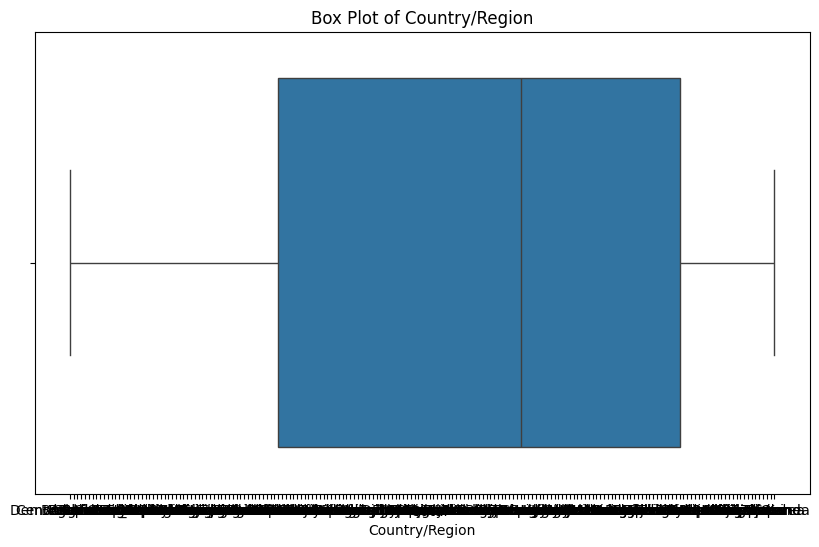

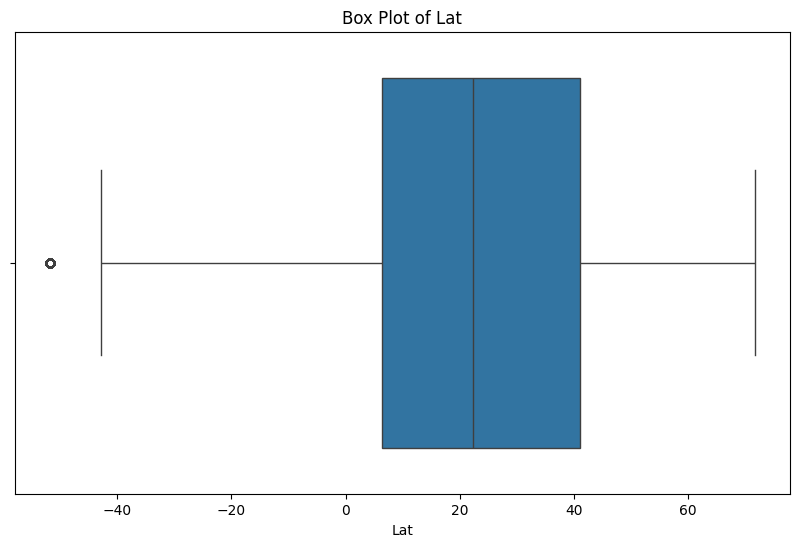

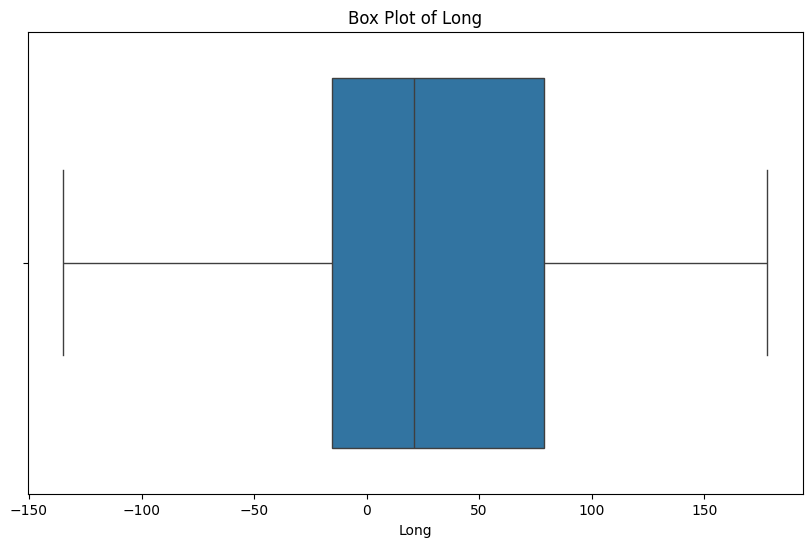

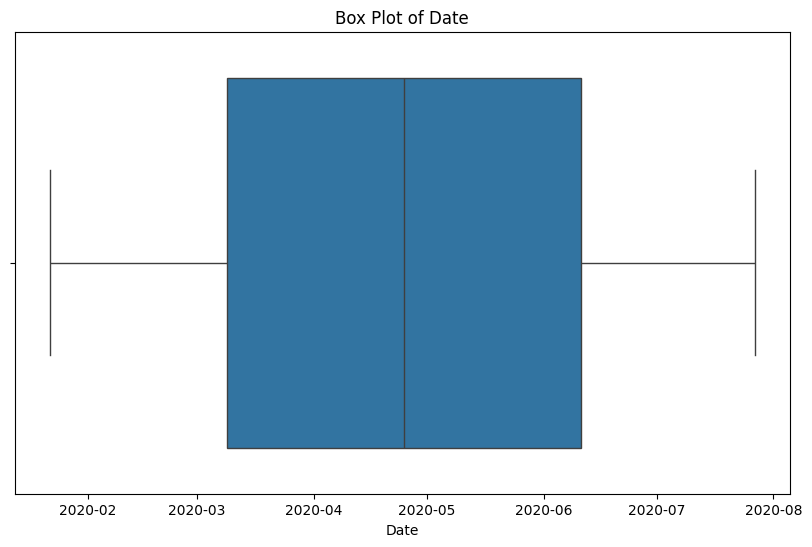

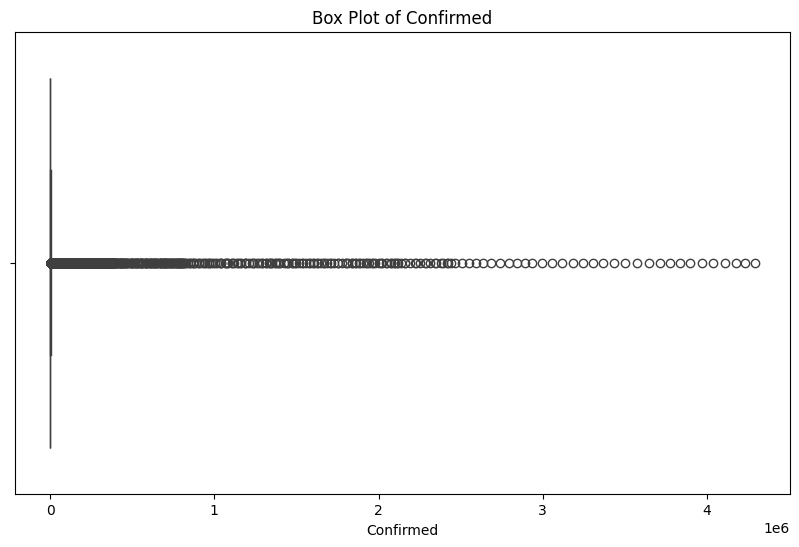

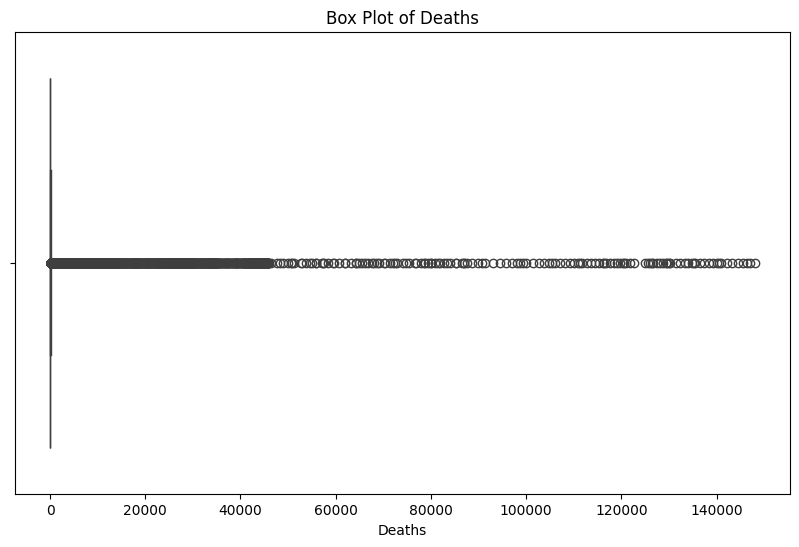

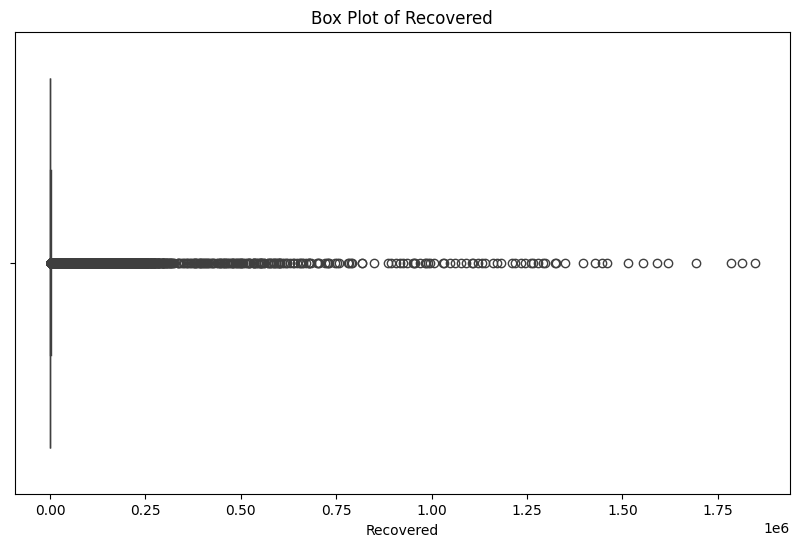

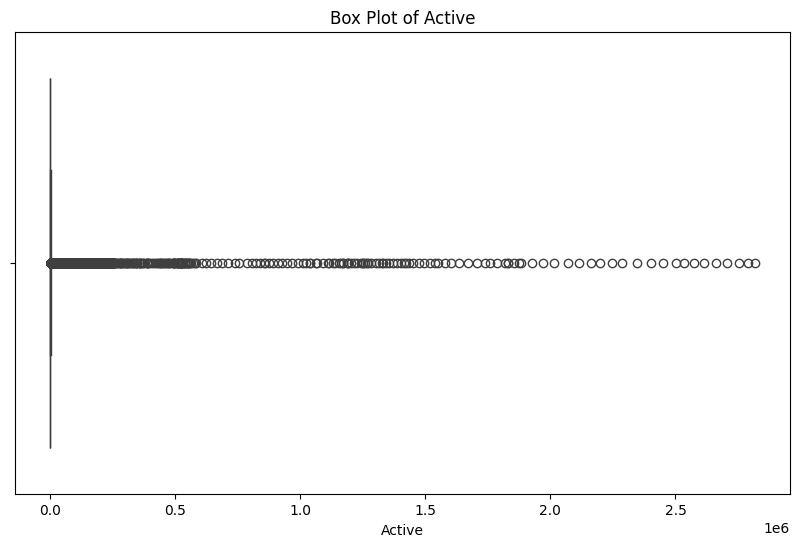

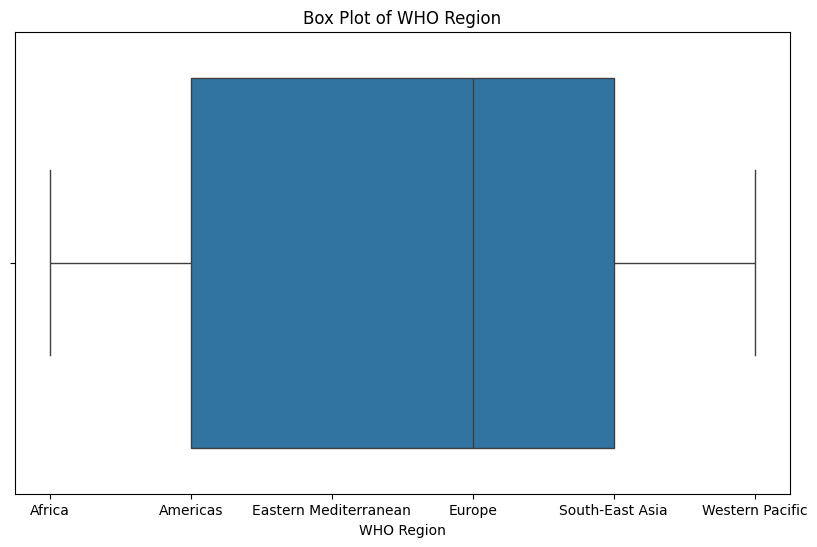

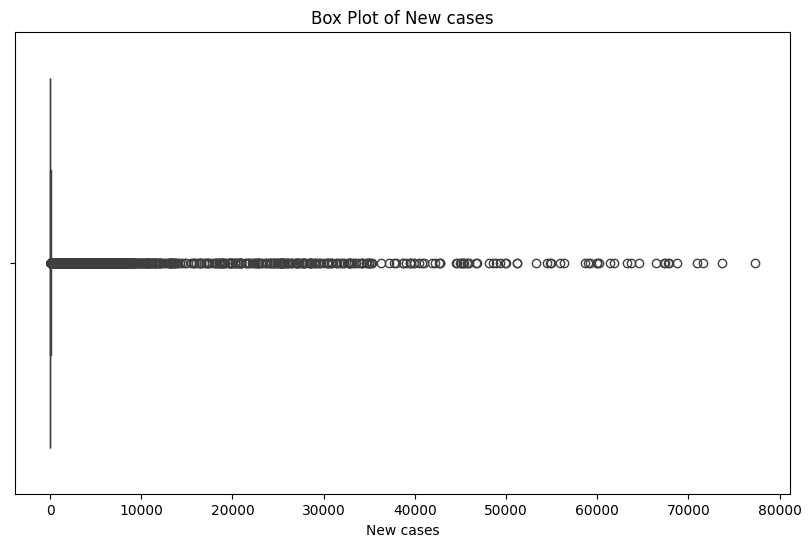

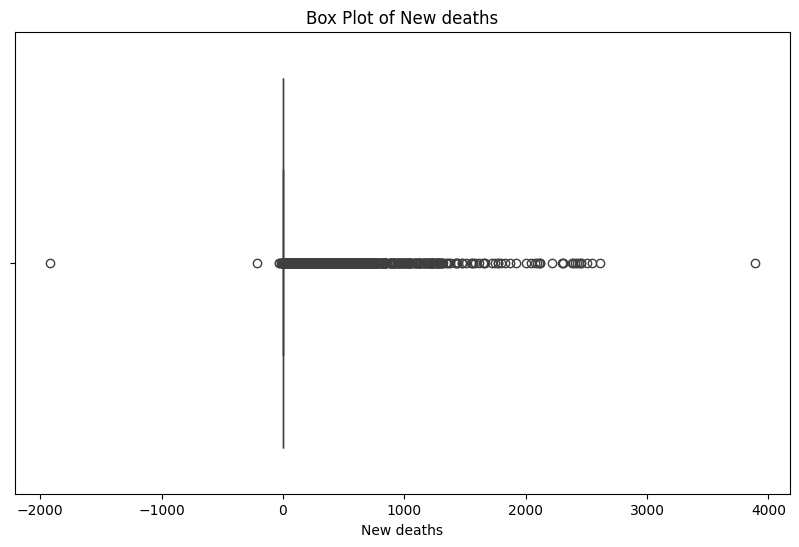

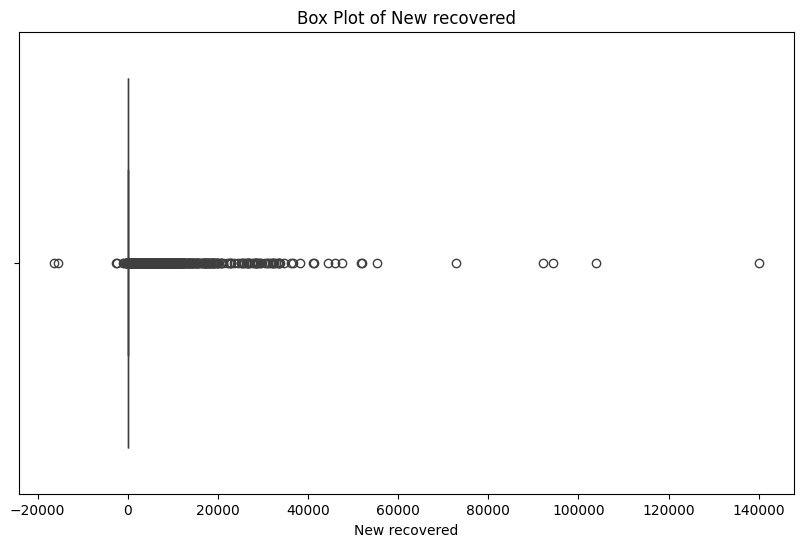

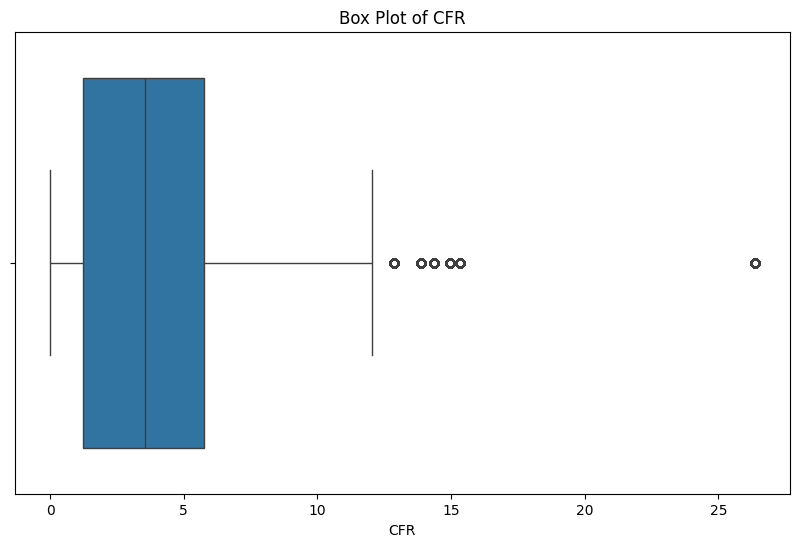

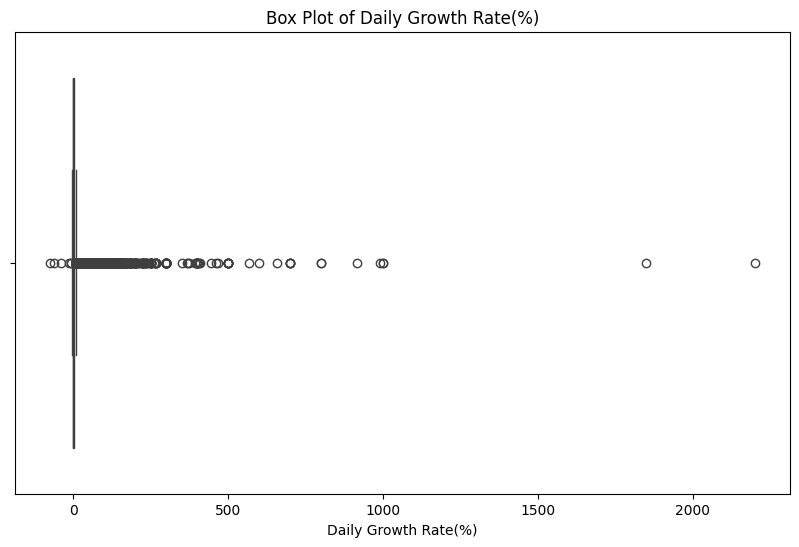

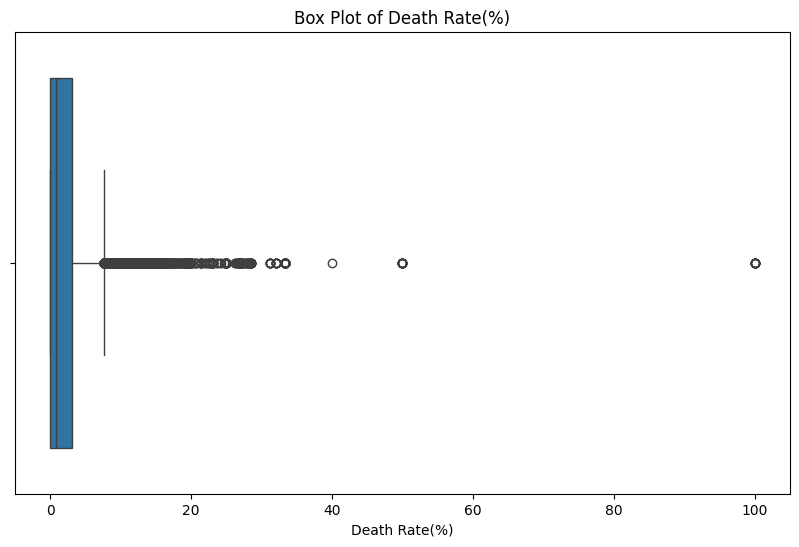

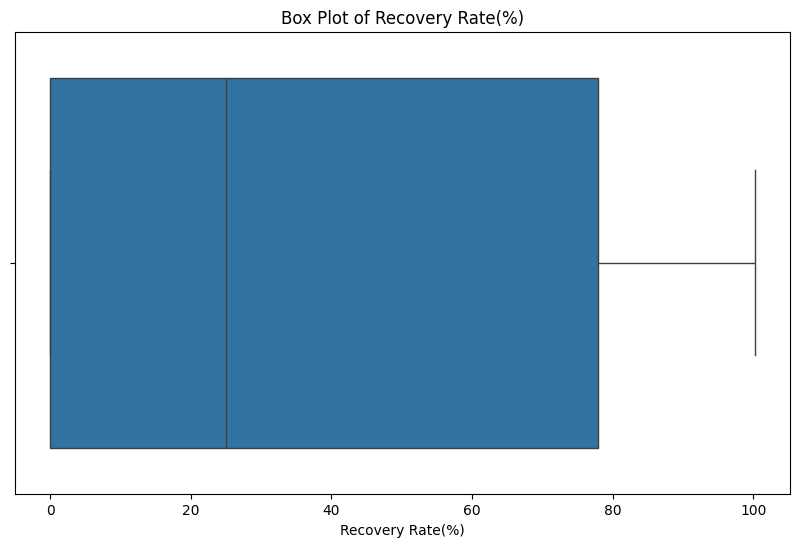

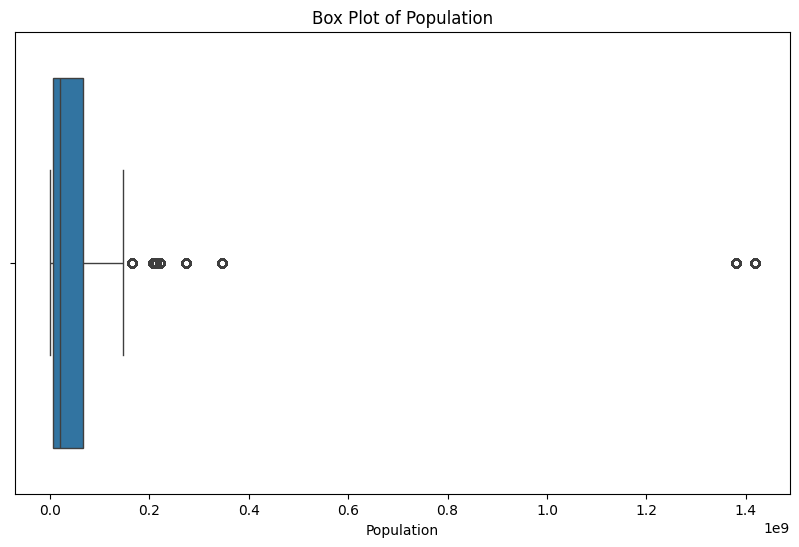

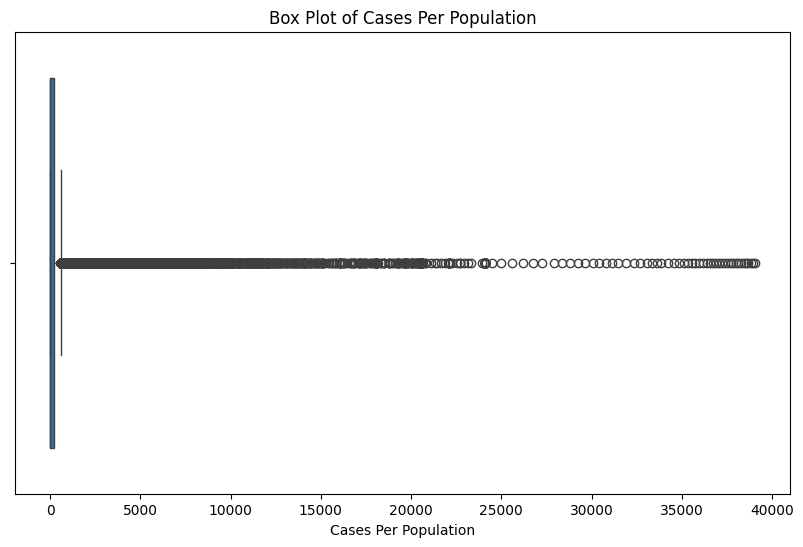

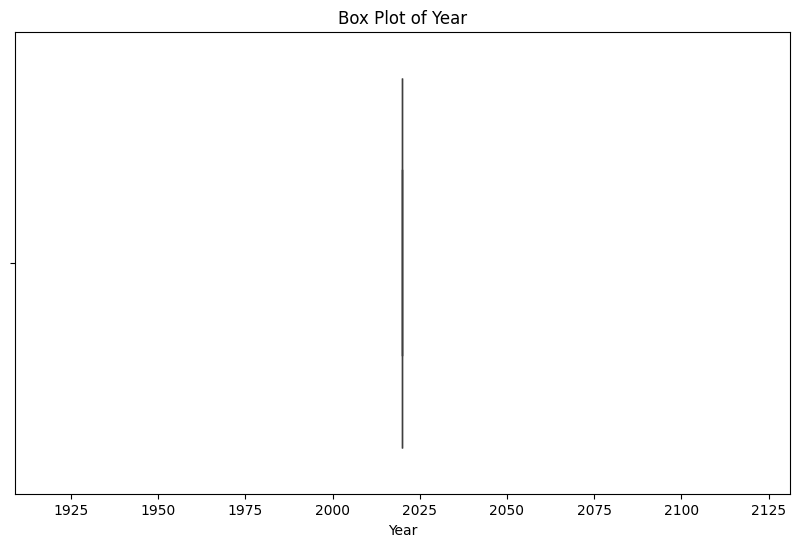

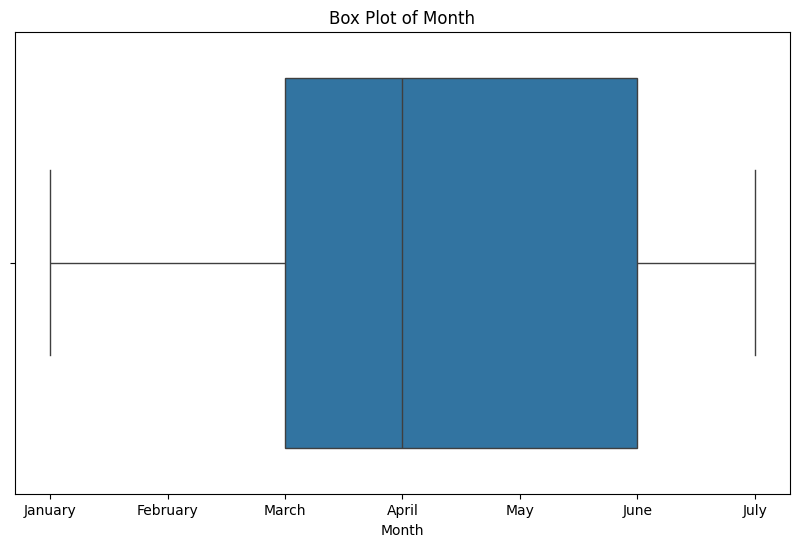

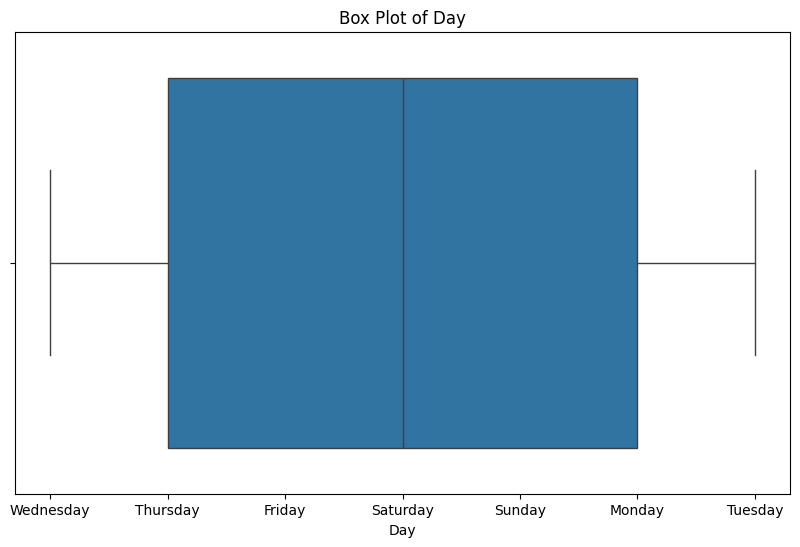

In [512]:
# I created a function that creates a box plot for every column in the df0a dataset.
# The aim is to help detect outliers
for column in df0a.columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df0a[column])
  plt.title(f'Box Plot of {column}')
  plt.show()

## GLOBAL EDA (TIME SERIES ANALYSIS)

I. Global trends over time

a. Total Confirmed, Deaths, and Recoveries

b. Growth Rate

c. Case Fatality Rate

d. Deaths vs Confirmed

In [513]:
global_daily_trend_over_time = df0a.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]
global_daily_trend_over_time

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,1103,34,56
2020-01-23,1297,36,60
2020-01-24,1861,52,72
2020-01-25,2840,84,78
2020-01-26,4197,112,101
...,...,...,...
2020-07-23,16306115,729806,8893145
2020-07-24,16590651,736095,9122472
2020-07-25,16848105,741042,9341664


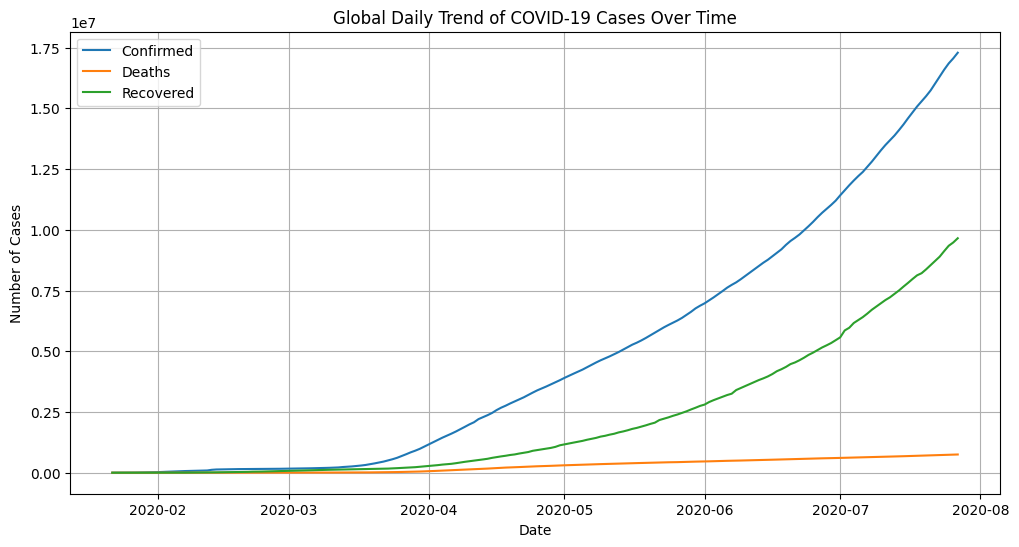

In [514]:
# Create the line plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(global_daily_trend_over_time.index, global_daily_trend_over_time['Confirmed'], label='Confirmed')
plt.plot(global_daily_trend_over_time.index, global_daily_trend_over_time['Deaths'], label='Deaths')
plt.plot(global_daily_trend_over_time.index, global_daily_trend_over_time['Recovered'], label='Recovered')

# Customize the plot
plt.title('Global Daily Trend of COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)  # Add a grid for better readability
plt.legend()  # Show the legend

# Display the plot
plt.show()

In [515]:
# To get global growth rate
global_growth_rate = df0a.groupby('Date')['Daily Growth Rate(%)'].mean().reset_index()

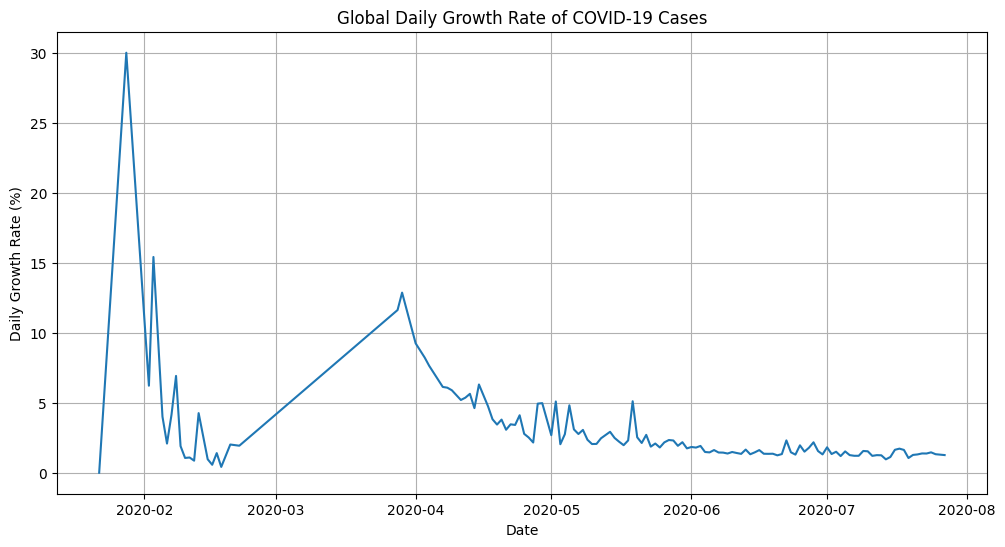

In [516]:
# Global growth rate visualization

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.lineplot(x='Date', y='Daily Growth Rate(%)', data=global_growth_rate)
plt.title('Global Daily Growth Rate of COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Daily Growth Rate (%)')
plt.grid(True)
plt.show()

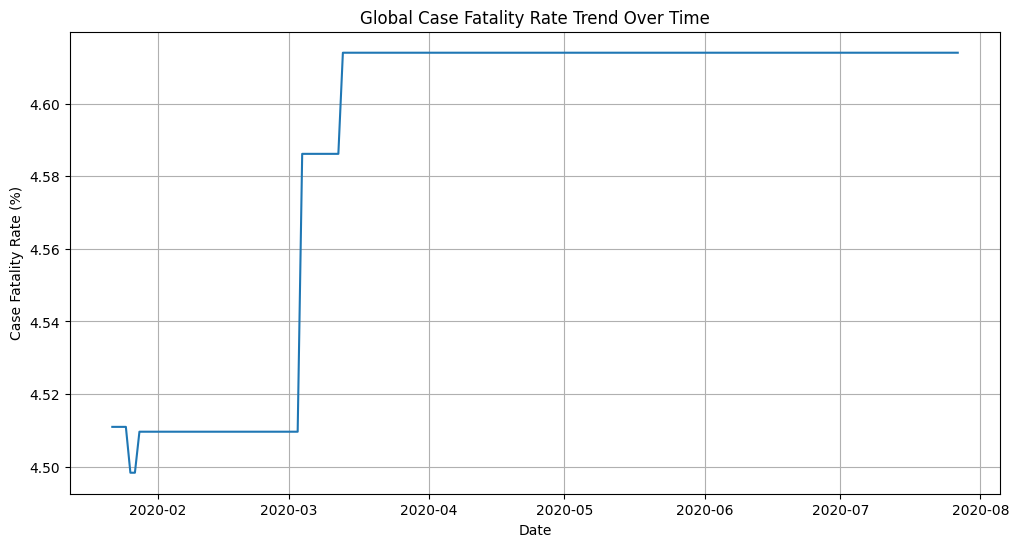

In [517]:
# 2. Global Case Fatality rate over time:
global_cfr_trend = df0a.groupby('Date')['CFR'].mean()
plt.figure(figsize=(12, 6))
plt.plot(global_cfr_trend.index, global_cfr_trend.values)
plt.title('Global Case Fatality Rate Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Case Fatality Rate (%)')
plt.grid(True)
plt.show()

<Axes: >

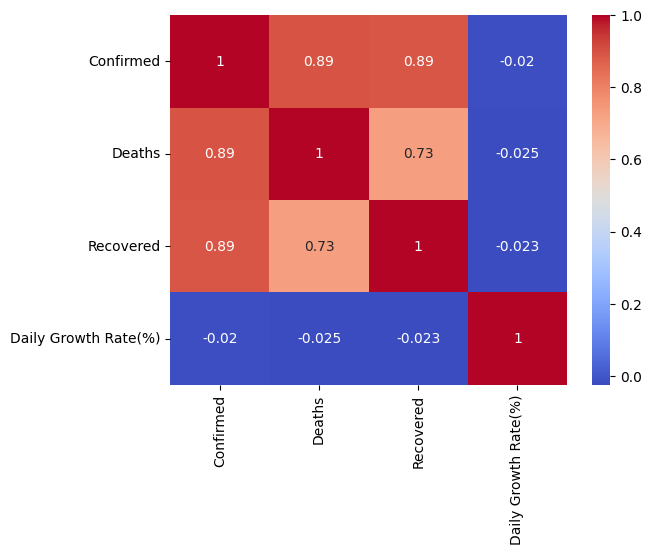

In [518]:
# To get the correlation, I used the .corr() method
correlation = df0a[['Confirmed', 'Deaths', 'Recovered', 'Daily Growth Rate(%)']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

## NIGERIA

In [519]:
# Filter data for Nigeria
df_9ja = df0a[df0a['Country/Region'] == 'Nigeria']
df_9ja

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,...,New recovered,CFR,Daily Growth Rate(%),Death Rate(%),Recovery Rate(%),Population,Cases Per Population,Year,Month,Day
1968,Nigeria,9.082,8.6753,2020-01-22,0,0,0,0,Africa,0.0,...,0.0,2.41,0.00,0.00,0.00,206606300,0.000000,2020,January,Wednesday
1969,Nigeria,9.082,8.6753,2020-01-23,0,0,0,0,Africa,0.0,...,0.0,2.41,0.00,0.00,0.00,206606300,0.000000,2020,January,Thursday
1970,Nigeria,9.082,8.6753,2020-01-24,0,0,0,0,Africa,0.0,...,0.0,2.41,0.00,0.00,0.00,206606300,0.000000,2020,January,Friday
1971,Nigeria,9.082,8.6753,2020-01-25,0,0,0,0,Africa,0.0,...,0.0,2.41,0.00,0.00,0.00,206606300,0.000000,2020,January,Saturday
1972,Nigeria,9.082,8.6753,2020-01-26,0,0,0,0,Africa,0.0,...,0.0,2.41,0.00,0.00,0.00,206606300,0.000000,2020,January,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46528,Nigeria,9.082,8.6753,2020-07-23,38948,833,16061,22054,Africa,604.0,...,246.0,2.41,1.58,2.14,41.24,206606300,188.513129,2020,July,Thursday
46562,Nigeria,9.082,8.6753,2020-07-24,39539,845,16559,22135,Africa,591.0,...,498.0,2.41,1.52,2.14,41.88,206606300,191.373642,2020,July,Friday
46583,Nigeria,9.082,8.6753,2020-07-25,39977,856,16948,22173,Africa,438.0,...,389.0,2.41,1.11,2.14,42.39,206606300,193.493616,2020,July,Saturday
46611,Nigeria,9.082,8.6753,2020-07-26,40532,858,17374,22300,Africa,555.0,...,426.0,2.41,1.39,2.12,42.86,206606300,196.179884,2020,July,Sunday


In [520]:
# To get the overview detail of confirmed cases, deaths and recoveries in Nigeria
confirmed_9ja = df_9ja.Confirmed.sum()
deaths_9ja = df_9ja.Deaths.sum()
recovered_9ja = df_9ja.Recovered.sum()
active_9ja = df_9ja.Active.sum()

print (f"Total Nigeria confirmed covid-19 case: {confirmed_9ja}")
print (f"Total Nigeria deaths covid-19 case: {deaths_9ja}")
print (f"Total Nigeria recovered covid-19 case: {recovered_9ja}")
print (f"Total Nigeria active covid-19 case: {active_9ja}")


Total Nigeria confirmed covid-19 case: 1634040
Total Nigeria deaths covid-19 case: 39416
Total Nigeria recovered covid-19 case: 600928
Total Nigeria active covid-19 case: 993696


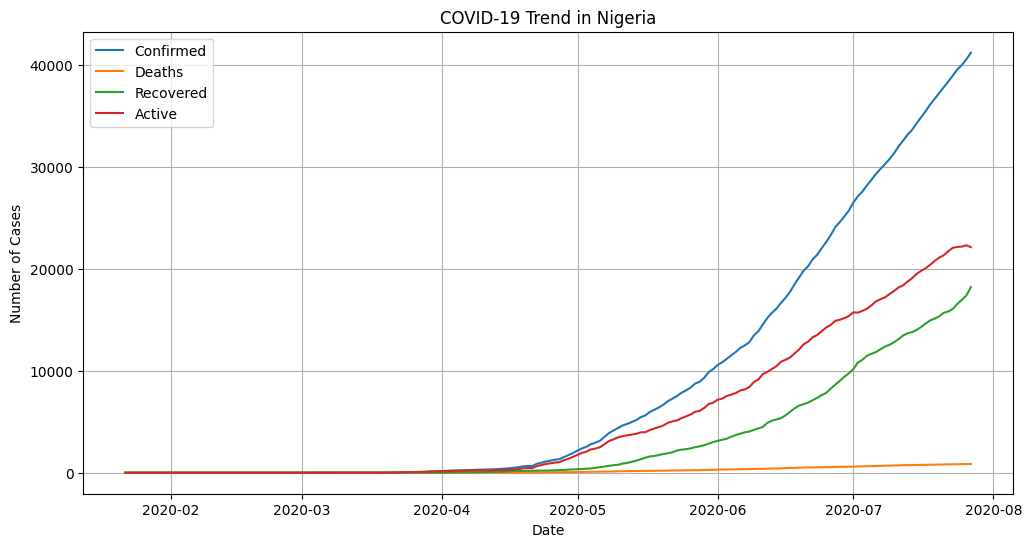

In [521]:
# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Plot each category
sns.lineplot(x='Date', y='Confirmed', data=df_9ja, label='Confirmed')
sns.lineplot(x='Date', y='Deaths', data=df_9ja, label='Deaths')
sns.lineplot(x='Date', y='Recovered', data=df_9ja, label='Recovered')
sns.lineplot(x='Date', y='Active', data=df_9ja, label='Active')

# Customize the plot
plt.title('COVID-19 Trend in Nigeria')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.legend()  # Add a legend

# Display the plot
plt.show()

# MACHINE LEARNING

## MODEL BUILDING



In [522]:
df0a.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region', 'New cases', 'New deaths',
       'New recovered', 'CFR', 'Daily Growth Rate(%)', 'Death Rate(%)',
       'Recovery Rate(%)', 'Population', 'Cases Per Population', 'Year',
       'Month', 'Day'],
      dtype='object')

## 1. Time Series Analysis

### Confirmed

In [525]:
features = ['Date', 'Active', 'CFR', 'Death Rate(%)', 'Recovery Rate(%)', 'Population', 'Cases Per Population']
target = 'Confirmed'
X = df0a[features]
y = df0a[target]

le = LabelEncoder()
df0a['Date'] = le.fit_transform(df0a['Date'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [526]:
y_pred = reg.predict(X_test)
rmse   = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Training Score: ', reg.score(X_train, y_train))
print('Testing Score: ', reg.score(X_test, y_test))
print('RMSE: ',rmse)
print("MAE:", mae)
print("R² Score:", r2)

Training Score:  0.9189490859144532
Testing Score:  0.8282999521481916
RMSE:  42265.15296496304
MAE: 10266.573665403717
R² Score: 0.8282999521481916


In [527]:
y_pred

array([-2528.63149377,  2017.52019436, -3972.77761613, ...,
       -3584.09650602,  8088.65243016, 22576.0286191 ])

### Deaths

In [528]:
features = ['Date', 'Active', 'CFR', 'Death Rate(%)', 'Recovery Rate(%)', 'Population', 'Cases Per Population']
target = 'Deaths'
X = df0a[features]
y = df0a[target]

le = LabelEncoder()
df0a['Date'] = le.fit_transform(df0a['Date'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [529]:
y_pred = reg.predict(X_test)
rmse   = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Training Score: ', reg.score(X_train, y_train))
print('Testing Score: ', reg.score(X_test, y_test))
print('RMSE: ',rmse)
print("MAE:", mae)
print("R² Score:", r2)

Training Score:  0.8132690721788174
Testing Score:  0.7685365741326483
RMSE:  2869.582916407153
MAE: 1062.3155633887359
R² Score: 0.7685365741326483


In [530]:
y_pred

array([-652.53915987,  696.34020497,  608.95031115, ...,  914.95389048,
        836.15631791, 1836.69485981])

### Recovered

In [531]:
features = ['Date', 'Active', 'CFR', 'Death Rate(%)', 'Recovery Rate(%)', 'Population', 'Cases Per Population']
target = 'Deaths'
X = df0a[features]
y = df0a[target]

le = LabelEncoder()
df0a['Date'] = le.fit_transform(df0a['Date'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [532]:
y_pred = reg.predict(X_test)
rmse   = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Training Score: ', reg.score(X_train, y_train))
print('Testing Score: ', reg.score(X_test, y_test))
print('RMSE: ',rmse)
print("MAE:", mae)
print("R² Score:", r2)

Training Score:  0.8132690721788174
Testing Score:  0.7685365741326483
RMSE:  2869.582916407153
MAE: 1062.3155633887359
R² Score: 0.7685365741326483


In [533]:
y_pred

array([-652.53915987,  696.34020497,  608.95031115, ...,  914.95389048,
        836.15631791, 1836.69485981])

## 2. FORECASTING

In [534]:
confirmed = global_daily_trend_over_time['Confirmed']
deaths = global_daily_trend_over_time['Deaths']
recovered =global_daily_trend_over_time['Recovered']

In [535]:
confirmed.head()

,Confirmed
Date,
2020-01-22,1103
2020-01-23,1297
2020-01-24,1861
2020-01-25,2840
2020-01-26,4197


#### Base Model
 Geneartion of a 7 days ahead forecast for confirmed, deaths and recovery based on a 95% prediction interval

### Confirmed

In [536]:
confirmed = global_daily_trend_over_time[['Confirmed']].reset_index()  # Convert to DataFrame
confirmed.columns = ['ds', 'y']  # Rename columns
confirmed.ds = pd.to_datetime(confirmed.ds)  # Convert 'ds' to datetime

In [537]:
confirmed.columns = ['ds', 'y']
confirmed.ds = pd.to_datetime(confirmed.ds)

In [538]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjtui5xz2/8pyb4w8l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjtui5xz2/hlbhmu0k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53675', 'data', 'file=/tmp/tmpjtui5xz2/8pyb4w8l.json', 'init=/tmp/tmpjtui5xz2/hlbhmu0k.json', 'output', 'file=/tmp/tmpjtui5xz2/prophet_modelm9_g9f6l/prophet_model-20241129133243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [539]:
# To predict the future with date and a upper and lower limit of y value
# future = m.make_future_dataframe(periods=7, freq='D')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,1.755681e+07,1.740831e+07,1.772620e+07
191,2020-07-31,1.777445e+07,1.761153e+07,1.793169e+07
192,2020-08-01,1.798379e+07,1.781497e+07,1.816719e+07
193,2020-08-02,1.818379e+07,1.800145e+07,1.835156e+07
194,2020-08-03,1.838078e+07,1.818803e+07,1.856754e+07


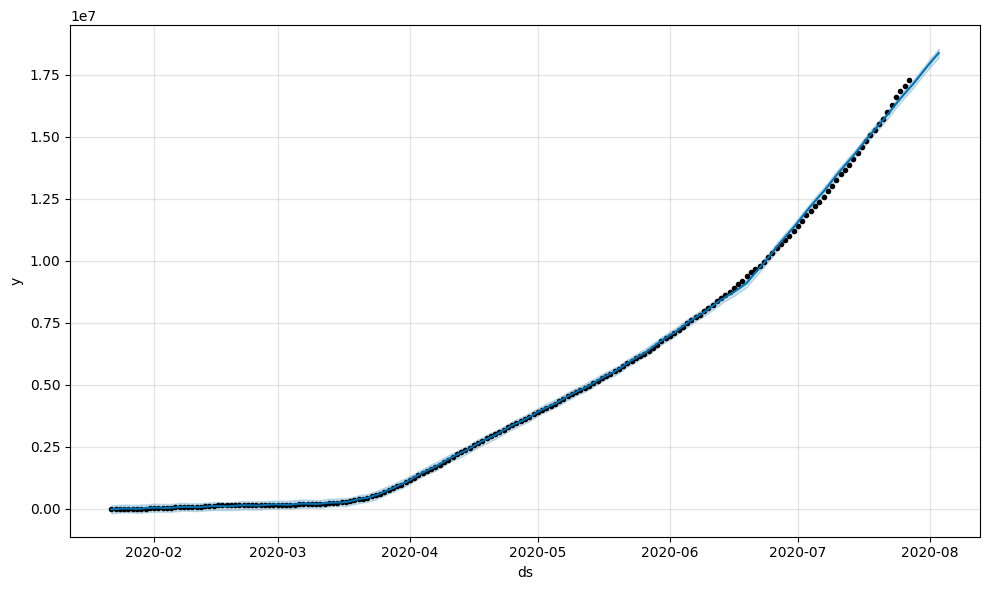

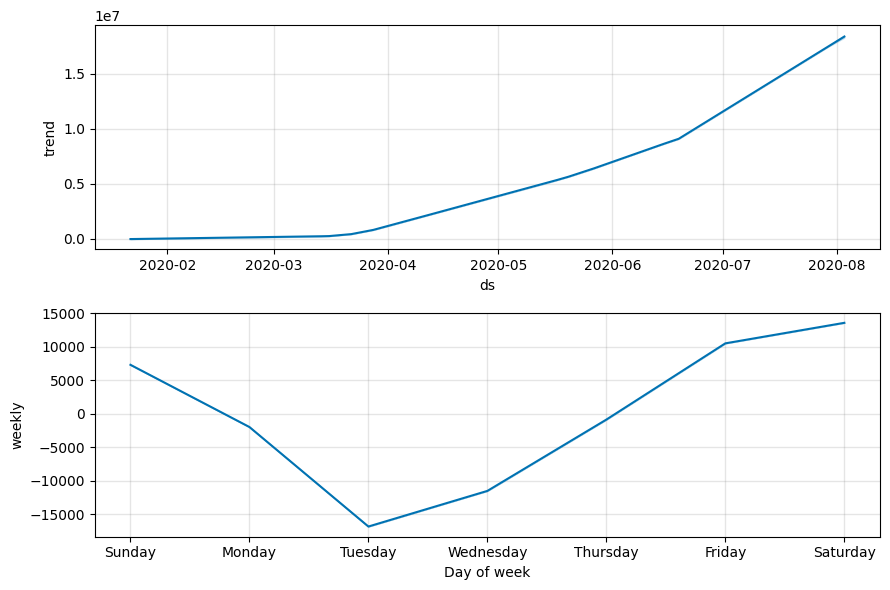

In [540]:
# I am plotting the forecast and passing it into my forecast dataframe
confirmed_forecast_plot = m.plot(forecast)

confirmed_forecast_plot = m.plot_components(forecast)

### Deaths

In [541]:
deaths = global_daily_trend_over_time[['Deaths']].reset_index()  # Convert to DataFrame
deaths.columns = ['ds', 'y']  # Rename columns
deaths.ds = pd.to_datetime(confirmed.ds)  # Convert 'ds' to datetime

In [542]:
deaths.columns = ['ds', 'y']
deaths.ds = pd.to_datetime(deaths.ds)

In [543]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjtui5xz2/ft3ilb3q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjtui5xz2/20jtee2m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78051', 'data', 'file=/tmp/tmpjtui5xz2/ft3ilb3q.json', 'init=/tmp/tmpjtui5xz2/20jtee2m.json', 'output', 'file=/tmp/tmpjtui5xz2/prophet_model1v6bpnaa/prophet_model-20241129133245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [544]:
# To predict the future with date and a upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,760877.131660,757532.174873,764311.590006
191,2020-07-31,766631.425386,762989.832496,770680.202802
192,2020-08-01,771618.814771,767051.503766,775971.031813
193,2020-08-02,775690.575187,769640.451062,781706.324913
194,2020-08-03,779944.807409,772647.113982,787553.128211


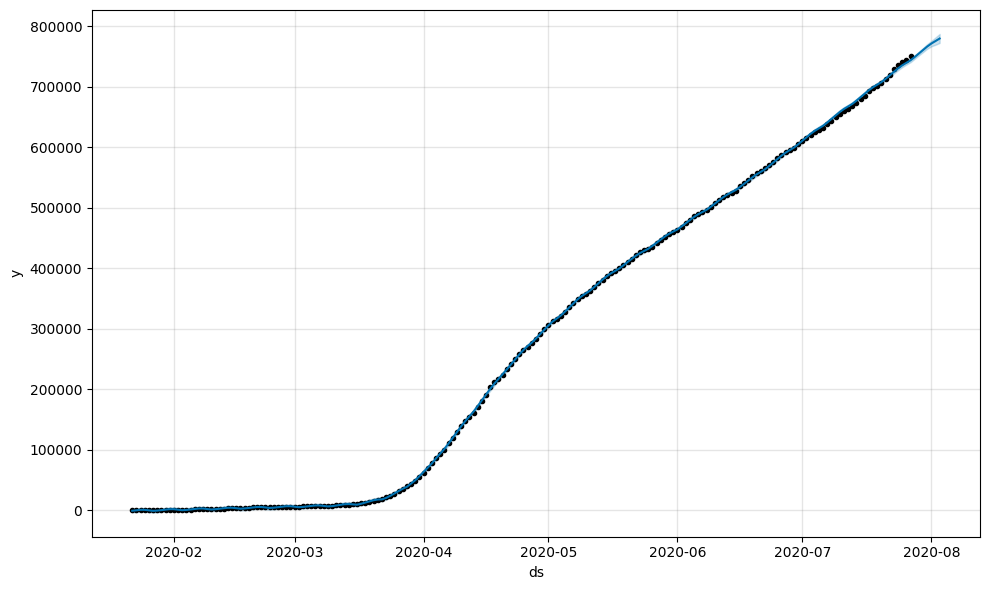

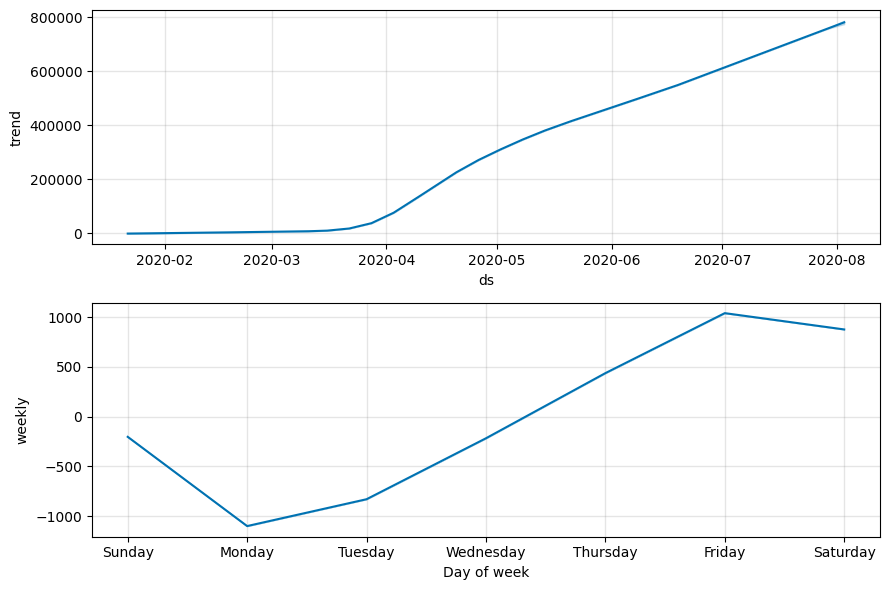

In [545]:
# I am plotting the forecast and passing it into my forecast dataframe
deaths_forecast_plot = m.plot(forecast)

deaths_forecast_plot = m.plot_components(forecast)

### Recovery

In [546]:
recovered = global_daily_trend_over_time[['Recovered']].reset_index()  # Convert to DataFrame
recovered.columns = ['ds', 'y']  # Rename columns
recovered.ds = pd.to_datetime(confirmed.ds)  # Convert 'ds' to datetime

In [547]:
recovered.columns = ['ds', 'y']
recovered.ds = pd.to_datetime(recovered.ds)

In [548]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjtui5xz2/_4syx_mx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjtui5xz2/gxsabily.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2217', 'data', 'file=/tmp/tmpjtui5xz2/_4syx_mx.json', 'init=/tmp/tmpjtui5xz2/gxsabily.json', 'output', 'file=/tmp/tmpjtui5xz2/prophet_modelm5ii0z6s/prophet_model-20241129133247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [549]:
# To predict the future with date and a upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,9.781907e+06,9.668216e+06,9.911912e+06
191,2020-07-31,9.923770e+06,9.800489e+06,1.004525e+07
192,2020-08-01,1.006427e+07,9.945867e+06,1.019042e+07
193,2020-08-02,1.019030e+07,1.005956e+07,1.031822e+07
194,2020-08-03,1.032687e+07,1.017673e+07,1.045059e+07


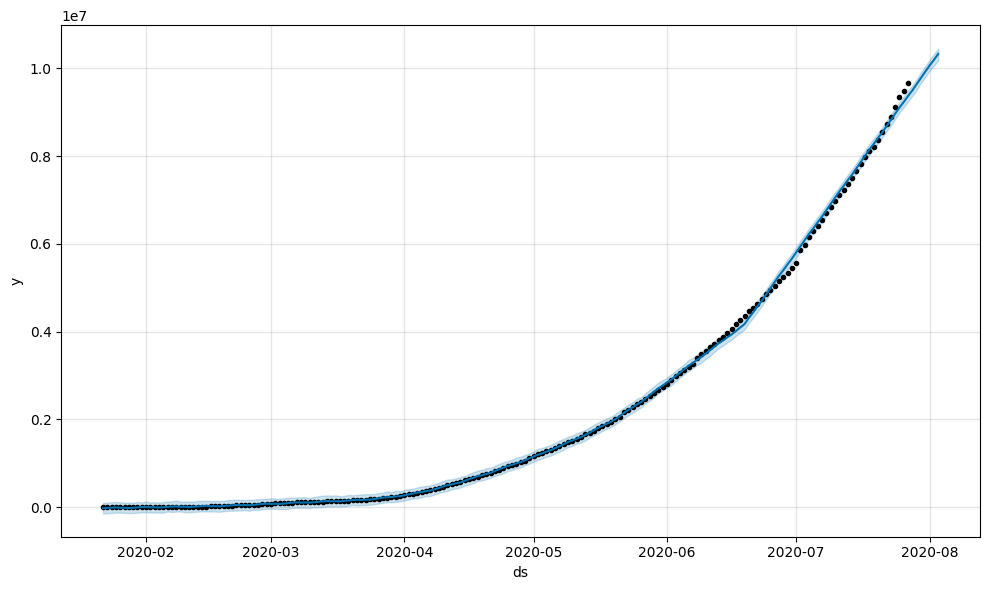

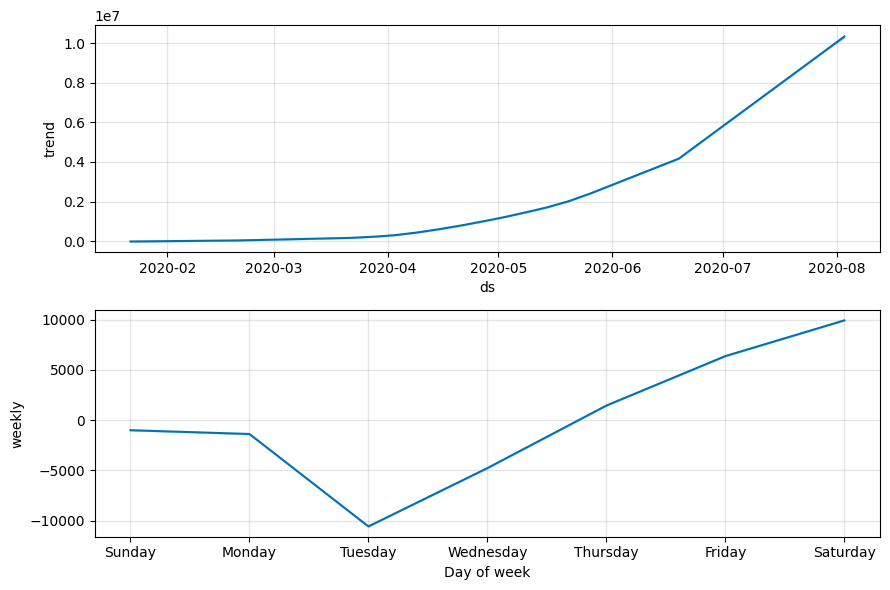

In [550]:
# I am plotting the forecast and passing it into my forecast dataframe
recovered_forecast_plot = m.plot(forecast)

recovered_forecast_plot = m.plot_components(forecast)